In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, timezone

start_date = (datetime.now() - timedelta(days = 365 * 25)).strftime('%Y-%m-%d')
end_date = datetime.now().strftime('%Y-%m-%d')
interval = '1d'

def prepare_data(symbol, start_date, end_date, interval='1d'):
    """
    Prepare stock data including market cap for a given symbol.
    
    :param symbol: Stock symbol (e.g., 'AAPL')
    :param start_date: Start date for historical data
    :param end_date: End date for historical data
    :param interval: Data interval (default is '1d' for daily)
    :return: DataFrame with prepared stock data
    """
    # Fetch stock data
    data = yf.Ticker(symbol)
    
    # Get historical data
    df = data.history(start=start_date, end=end_date, interval=interval).reset_index()
    
    # Convert date to UTC timestamp
    df['timestamp_utc'] = (pd.to_datetime(df['Date']).dt.tz_convert('UTC').astype(int) // 10**6)
    
    # Calculate returns and log returns
    df['returns_close'] = (df['Close'] / df['Close'].shift(1)) - 1
    df['logreturns_close'] = np.log(df['Close'] / df['Close'].shift(1))
    
    # Fetch market cap
    info = data.info
    market_cap = info.get('marketCap', None)
    
    # Add market cap as a new column
    # Note: This will be the same value for all rows, representing the current market cap
    df['MC'] = market_cap
    
    # Sort and reset index
    df = df.sort_values(by='timestamp_utc', ascending=True).reset_index(drop=True)
    
    return df

nyse_semiconductor_symbols = [
    "AMAT",  # Applied Materials, Inc.
    "TSM",   # Taiwan Semiconductor Manufacturing Company Limited (ADR)
    "TXN",   # Texas Instruments Incorporated
    "NVDA",  # NVIDIA Corporation
    "AMD",   # Advanced Micro Devices, Inc.
    "INTC",  # Intel Corporation
    "MU",    # Micron Technology, Inc.
    "QCOM",  # QUALCOMM Incorporated
    # "AVGO",  # Broadcom Inc.
]

all_data = None

for s in nyse_semiconductor_symbols:
    try:
        data = prepare_data(s, start_date, end_date, interval)
        if all_data is None:
            all_data = data[['timestamp_utc', 'Close', 'MC']].rename(columns={'Close': s + '_Close', 'MC': s + '_MC'})
        else:
            all_data = all_data.merge(data[['timestamp_utc', 'Close', 'MC']].rename(columns={'Close': s + '_Close', 'MC': s + '_MC'}), on='timestamp_utc', how='left')
    except Exception as e:
        print(f"Error processing {s}: {e}")
all_data['datetime'] = pd.to_datetime(all_data['timestamp_utc'], unit='ms', utc=True)
all_data

timestamp_utc  AMAT_Close       AMAT_MC   TSM_Close        TSM_MC  \
0      939355200000   15.079662  166570819584    5.787590  900666490880   
1      939614400000   15.171330  166570819584    6.038705  900666490880   
2      939700800000   14.896327  166570819584    6.002832  900666490880   
3      939787200000   14.586934  166570819584    5.940052  900666490880   
4      939873600000   14.718717  166570819584    6.086534  900666490880   
...             ...         ...           ...         ...           ...   
6279  1727150400000  196.779999  166570819584  181.970001  900666490880   
6280  1727236800000  197.309998  166570819584  182.350006  900666490880   
6281  1727323200000  209.610001  166570819584  186.830002  900666490880   
6282  1727409600000  204.919998  166570819584  177.970001  900666490880   
6283  1727668800000  202.050003  166570819584  173.669998  900666490880   

       TXN_Close        TXN_MC  NVDA_Close        NVDA_MC   AMD_Close  \
0      27.367342  188607922176    0.044902  2978923151360    9.281250   
1      28.699896  188607922176    0.043708  2978923151360    9.500000   
2      27.049107  188607922176    0.043111  2978923151360    9.375000   
3      27.208216  188607922176    0.041916  2978923151360    9.125000   
4      27.049107  188607922176    0.041081  2978923151360    9.000000   
...          ...           ...         ...            ...         ...   
6279  204.940002  188607922176  120.870003  2978923151360  158.320007   
6280  205.059998  188607922176  123.510002  2978923151360  162.020004   
6281  209.259995  188607922176  124.040001  2978923151360  167.490005   
6282  209.139999  188607922176  121.400002  2978923151360  164.350006   
6283  206.570007  188607922176  121.440002  2978923151360  164.080002   

            AMD_MC  INTC_Close       INTC_MC    MU_Close         MU_MC  \
0     265560195072   21.489233  100314955776   33.884476  114997788672   
1     265560195072   21.719915  100314955776   34.528435  114997788672   
2     265560195072   21.773161  100314955776   31.921938  114997788672   
3     265560195072   20.477774  100314955776   32.964531  114997788672   
4     265560195072   20.823799  100314955776   33.424507  114997788672   
...            ...         ...           ...         ...           ...   
6279  265560195072   22.809999  100314955776   94.000000  114997788672   
6280  265560195072   23.540001  100314955776   95.769997  114997788672   
6281  265560195072   23.920000  100314955776  109.879997  114997788672   
6282  265560195072   23.910000  100314955776  107.500000  114997788672   
6283  265560195072   23.459999  100314955776  103.709999  114997788672   

      QCOM_Close       QCOM_MC                  datetime  
0      17.024948  189435707392 1999-10-08 04:00:00+00:00  
1      17.706337  189435707392 1999-10-11 04:00:00+00:00  
2      16.875738  189435707392 1999-10-12 04:00:00+00:00  
3      16.261482  189435707392 1999-10-13 04:00:00+00:00  
4      16.236618  189435707392 1999-10-14 04:00:00+00:00  
...          ...           ...                       ...  
6279  166.949997  189435707392 2024-09-24 04:00:00+00:00  
6280  168.270004  189435707392 2024-09-25 04:00:00+00:00  
6281  172.660004  189435707392 2024-09-26 04:00:00+00:00  
6282  170.130005  189435707392 2024-09-27 04:00:00+00:00  
6283  170.050003  189435707392 2024-09-30 04:00:00+00:00  

[6284 rows x 18 columns]

In [2]:
from ta.momentum import StochRSIIndicator

all_data_stochrsi = all_data.copy()

stochrsi_params = {
    'window' : 14,
    'smooth1' : 3,
    'smooth2' : 3,
    'fillna' : False
}

for s in nyse_semiconductor_symbols:
    all_data_stochrsi[f'{s}_stochrsi'] = StochRSIIndicator(close = all_data_stochrsi[s + '_Close'],
        window=stochrsi_params['window'],
        smooth1=stochrsi_params['smooth1'],
        smooth2=stochrsi_params['smooth2'],
        fillna=stochrsi_params['fillna']).stochrsi()
all_data_stochrsi

timestamp_utc  AMAT_Close       AMAT_MC   TSM_Close        TSM_MC  \
0      939355200000   15.079662  166570819584    5.787590  900666490880   
1      939614400000   15.171330  166570819584    6.038705  900666490880   
2      939700800000   14.896327  166570819584    6.002832  900666490880   
3      939787200000   14.586934  166570819584    5.940052  900666490880   
4      939873600000   14.718717  166570819584    6.086534  900666490880   
...             ...         ...           ...         ...           ...   
6279  1727150400000  196.779999  166570819584  181.970001  900666490880   
6280  1727236800000  197.309998  166570819584  182.350006  900666490880   
6281  1727323200000  209.610001  166570819584  186.830002  900666490880   
6282  1727409600000  204.919998  166570819584  177.970001  900666490880   
6283  1727668800000  202.050003  166570819584  173.669998  900666490880   

       TXN_Close        TXN_MC  NVDA_Close        NVDA_MC   AMD_Close  ...  \
0      27.367342  188607922176    0.044902  2978923151360    9.281250  ...   
1      28.699896  188607922176    0.043708  2978923151360    9.500000  ...   
2      27.049107  188607922176    0.043111  2978923151360    9.375000  ...   
3      27.208216  188607922176    0.041916  2978923151360    9.125000  ...   
4      27.049107  188607922176    0.041081  2978923151360    9.000000  ...   
...          ...           ...         ...            ...         ...  ...   
6279  204.940002  188607922176  120.870003  2978923151360  158.320007  ...   
6280  205.059998  188607922176  123.510002  2978923151360  162.020004  ...   
6281  209.259995  188607922176  124.040001  2978923151360  167.490005  ...   
6282  209.139999  188607922176  121.400002  2978923151360  164.350006  ...   
6283  206.570007  188607922176  121.440002  2978923151360  164.080002  ...   

           QCOM_MC                  datetime  AMAT_stochrsi  TSM_stochrsi  \
0     189435707392 1999-10-08 04:00:00+00:00            NaN           NaN   
1     189435707392 1999-10-11 04:00:00+00:00            NaN           NaN   
2     189435707392 1999-10-12 04:00:00+00:00            NaN           NaN   
3     189435707392 1999-10-13 04:00:00+00:00            NaN           NaN   
4     189435707392 1999-10-14 04:00:00+00:00            NaN           NaN   
...            ...                       ...            ...           ...   
6279  189435707392 2024-09-24 04:00:00+00:00       0.993911      1.000000   
6280  189435707392 2024-09-25 04:00:00+00:00       1.000000      1.000000   
6281  189435707392 2024-09-26 04:00:00+00:00       1.000000      1.000000   
6282  189435707392 2024-09-27 04:00:00+00:00       0.827912      0.470107   
6283  189435707392 2024-09-30 04:00:00+00:00       0.654006      0.060804   

      TXN_stochrsi  NVDA_stochrsi  AMD_stochrsi INTC_stochrsi  MU_stochrsi  \
0              NaN            NaN           NaN           NaN          NaN   
1              NaN            NaN           NaN           NaN          NaN   
2              NaN            NaN           NaN           NaN          NaN   
3              NaN            NaN           NaN           NaN          NaN   
4              NaN            NaN           NaN           NaN          NaN   
...            ...            ...           ...           ...          ...   
6279      0.745485       1.000000      1.000000      1.000000     1.000000   
6280      0.756447       1.000000      1.000000      1.000000     1.000000   
6281      1.000000       1.000000      1.000000      1.000000     1.000000   
6282      0.987374       0.764382      0.773810      0.997171     0.896665   
6283      0.715433       0.675256      0.701449      0.851190     0.713612   

      QCOM_stochrsi  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
...             ...  
6279       0.545785  
6280       0.638895  
6281       0.918313  
6282       0.674576  
6283       0.540729  

[6284 rows x 26 columns]

In [3]:
from ta.momentum import RSIIndicator

all_data_rsi = all_data.copy()

rsi_params = {
    'window' : 14,
    'fillna' : False
}

for s in nyse_semiconductor_symbols:
    all_data_rsi[f'{s}_rsi'] = RSIIndicator(close = all_data_rsi[s + '_Close'],
        window=rsi_params['window'],
        fillna=rsi_params['fillna']).rsi()
all_data_rsi

timestamp_utc  AMAT_Close       AMAT_MC   TSM_Close        TSM_MC  \
0      939355200000   15.079662  166570819584    5.787590  900666490880   
1      939614400000   15.171330  166570819584    6.038705  900666490880   
2      939700800000   14.896327  166570819584    6.002832  900666490880   
3      939787200000   14.586934  166570819584    5.940052  900666490880   
4      939873600000   14.718717  166570819584    6.086534  900666490880   
...             ...         ...           ...         ...           ...   
6279  1727150400000  196.779999  166570819584  181.970001  900666490880   
6280  1727236800000  197.309998  166570819584  182.350006  900666490880   
6281  1727323200000  209.610001  166570819584  186.830002  900666490880   
6282  1727409600000  204.919998  166570819584  177.970001  900666490880   
6283  1727668800000  202.050003  166570819584  173.669998  900666490880   

       TXN_Close        TXN_MC  NVDA_Close        NVDA_MC   AMD_Close  ...  \
0      27.367342  188607922176    0.044902  2978923151360    9.281250  ...   
1      28.699896  188607922176    0.043708  2978923151360    9.500000  ...   
2      27.049107  188607922176    0.043111  2978923151360    9.375000  ...   
3      27.208216  188607922176    0.041916  2978923151360    9.125000  ...   
4      27.049107  188607922176    0.041081  2978923151360    9.000000  ...   
...          ...           ...         ...            ...         ...  ...   
6279  204.940002  188607922176  120.870003  2978923151360  158.320007  ...   
6280  205.059998  188607922176  123.510002  2978923151360  162.020004  ...   
6281  209.259995  188607922176  124.040001  2978923151360  167.490005  ...   
6282  209.139999  188607922176  121.400002  2978923151360  164.350006  ...   
6283  206.570007  188607922176  121.440002  2978923151360  164.080002  ...   

           QCOM_MC                  datetime   AMAT_rsi    TSM_rsi    TXN_rsi  \
0     189435707392 1999-10-08 04:00:00+00:00        NaN        NaN        NaN   
1     189435707392 1999-10-11 04:00:00+00:00        NaN        NaN        NaN   
2     189435707392 1999-10-12 04:00:00+00:00        NaN        NaN        NaN   
3     189435707392 1999-10-13 04:00:00+00:00        NaN        NaN        NaN   
4     189435707392 1999-10-14 04:00:00+00:00        NaN        NaN        NaN   
...            ...                       ...        ...        ...        ...   
6279  189435707392 2024-09-24 04:00:00+00:00  54.121375  63.723542  53.386942   
6280  189435707392 2024-09-25 04:00:00+00:00  54.568003  64.022542  53.517829   
6281  189435707392 2024-09-26 04:00:00+00:00  63.458685  67.430765  57.966723   
6282  189435707392 2024-09-27 04:00:00+00:00  58.738604  56.109940  57.796520   
6283  189435707392 2024-09-30 04:00:00+00:00  55.993923  51.583560  54.130595   

       NVDA_rsi    AMD_rsi   INTC_rsi     MU_rsi   QCOM_rsi  
0           NaN        NaN        NaN        NaN        NaN  
1           NaN        NaN        NaN        NaN        NaN  
2           NaN        NaN        NaN        NaN        NaN  
3           NaN        NaN        NaN        NaN        NaN  
4           NaN        NaN        NaN        NaN        NaN  
...         ...        ...        ...        ...        ...  
6279  55.462610  60.692816  58.592144  50.169405  48.153871  
6280  58.079238  63.960201  61.961185  52.982614  49.688580  
6281  58.605037  68.172351  63.620482  68.331398  54.511239  
6282  54.910499  63.578681  63.541928  64.506224  51.450342  
6283  54.956834  63.184417  59.954506  58.855958  51.352148  

[6284 rows x 26 columns]

In [4]:
def plot_symbol_and_stochrsi(df, symbol):
    """
    Plot the symbol's price on one axis and its RSI on another axis.
    
    :param df: DataFrame containing the data
    :param symbol: String, the symbol to plot (e.g., 'AMAT')
    """
    fig, ax1 = plt.subplots(figsize=(20, 6))

    # Plot symbol price
    ax1.plot(df['datetime'], df[symbol + '_Close'], color='blue', label=f'{symbol} Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel(f'{symbol} Price', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create second y-axis for RSI
    ax2 = ax1.twinx()
    ax2.plot(df['datetime'], df[f'{symbol}_stochrsi'], color='red', label=f'{symbol} StochRSI')
    ax2.set_ylabel('StochRSI', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    plt.title(f'{symbol} Price and StochRSI Over Time')
    fig.tight_layout()
    plt.show()

def plot_symbol_and_rsi(df, symbol):
    """
    Plot the symbol's price on one axis and its RSI on another axis.
    
    :param df: DataFrame containing the data
    :param symbol: String, the symbol to plot (e.g., 'AMAT')
    """
    fig, ax1 = plt.subplots(figsize=(20, 6))

    # Plot symbol price
    ax1.plot(df['datetime'], df[symbol + '_Close'], color='blue', label=f'{symbol} Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel(f'{symbol} Price', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create second y-axis for RSI
    ax2 = ax1.twinx()
    ax2.plot(df['datetime'], df[f'{symbol}_rsi'], color='red', label=f'{symbol} RSI')
    ax2.set_ylabel('RSI', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    plt.title(f'{symbol} Price and RSI Over Time')
    fig.tight_layout()
    plt.show()

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

def plot_all_stochrsi(df):
    """
    Plot StochRSI for all symbols against datetime, creating two plots:
    1. Full data
    2. Data from 2024 onwards
    
    :param df: DataFrame containing the data
    """
    stochrsi_columns = [col for col in df.columns if col.endswith('_stochrsi')]
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 16))
    
    # Plot 1: Full data
    for col in stochrsi_columns:
        ax1.plot(df['datetime'], df[col], label=col)
    
    ax1.set_xlabel('Date')
    ax1.set_ylabel('StochRSI')
    ax1.set_title('StochRSI for All Symbols (Full Data)')
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True, linestyle='--', alpha=0.7)
    
    # Plot 2: Data from 2024 onwards
    df_2024 = df[df['datetime'] >= '2024-01-01']
    
    for col in stochrsi_columns:
        ax2.plot(df_2024['datetime'], df_2024[col], label=col)
    
    ax2.set_xlabel('Date')
    ax2.set_ylabel('StochRSI')
    ax2.set_title('StochRSI for All Symbols (From 2024)')
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2.tick_params(axis='x', rotation=45)
    ax2.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

def plot_all_rsi(df):
    """
    Plot RSI for all symbols against datetime, creating two plots:
    1. Full data
    2. Data from 2024 onwards
    
    :param df: DataFrame containing the data
    """
    rsi_columns = [col for col in df.columns if col.endswith('_rsi')]
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 16))
    
    # Plot 1: Full data
    for col in rsi_columns:
        ax1.plot(df['datetime'], df[col], label=col)
    
    ax1.axhline(y=50, color='gray', linestyle='--', label='Centerline (50)')
    ax1.axhline(y=70, color='red', linestyle='--', label='Overbought (70)')
    ax1.axhline(y=30, color='green', linestyle='--', label='Oversold (30)')
    
    ax1.set_xlabel('Date')
    ax1.set_ylabel('RSI')
    ax1.set_title('RSI for All Symbols (Full Data)')
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True, linestyle='--', alpha=0.7)
    
    # Plot 2: Data from 2024 onwards
    df_2024 = df[df['datetime'] >= '2024-01-01']
    
    for col in rsi_columns:
        ax2.plot(df_2024['datetime'], df_2024[col], label=col)
    
    ax2.axhline(y=50, color='gray', linestyle='--', label='Centerline (50)')
    ax2.axhline(y=70, color='red', linestyle='--', label='Overbought (70)')
    ax2.axhline(y=30, color='green', linestyle='--', label='Oversold (30)')
    
    ax2.set_xlabel('Date')
    ax2.set_ylabel('RSI')
    ax2.set_title('RSI for All Symbols (From 2024)')
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2.tick_params(axis='x', rotation=45)
    ax2.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

## Stoch RSI

In [5]:
# for s in nyse_semiconductor_symbols:
#     plot_symbol_and_stochrsi(all_data_stochrsi, symbol=s)

In [6]:
# plot_all_stochrsi(all_data_stochrsi)

## RSI

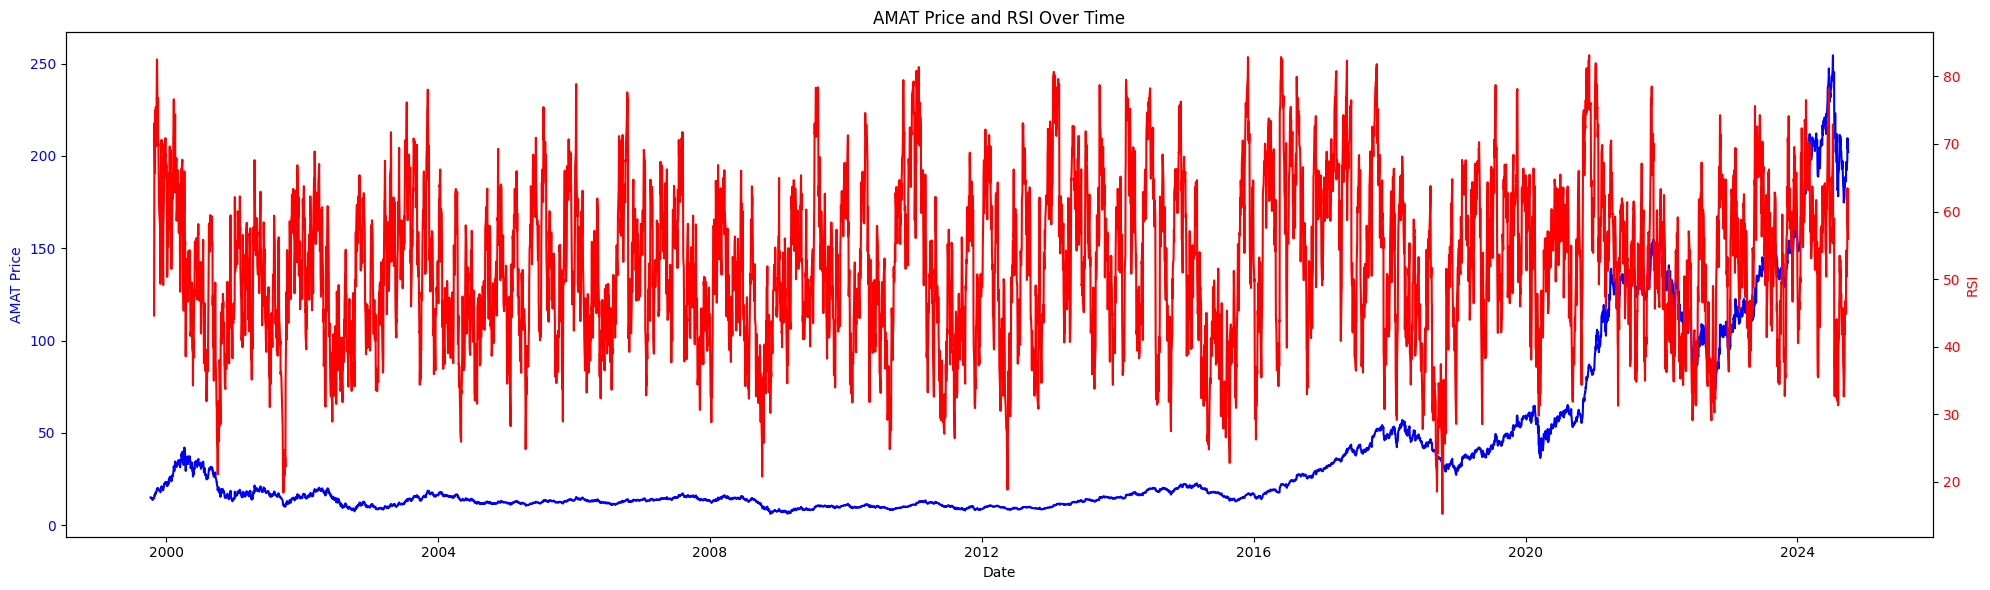

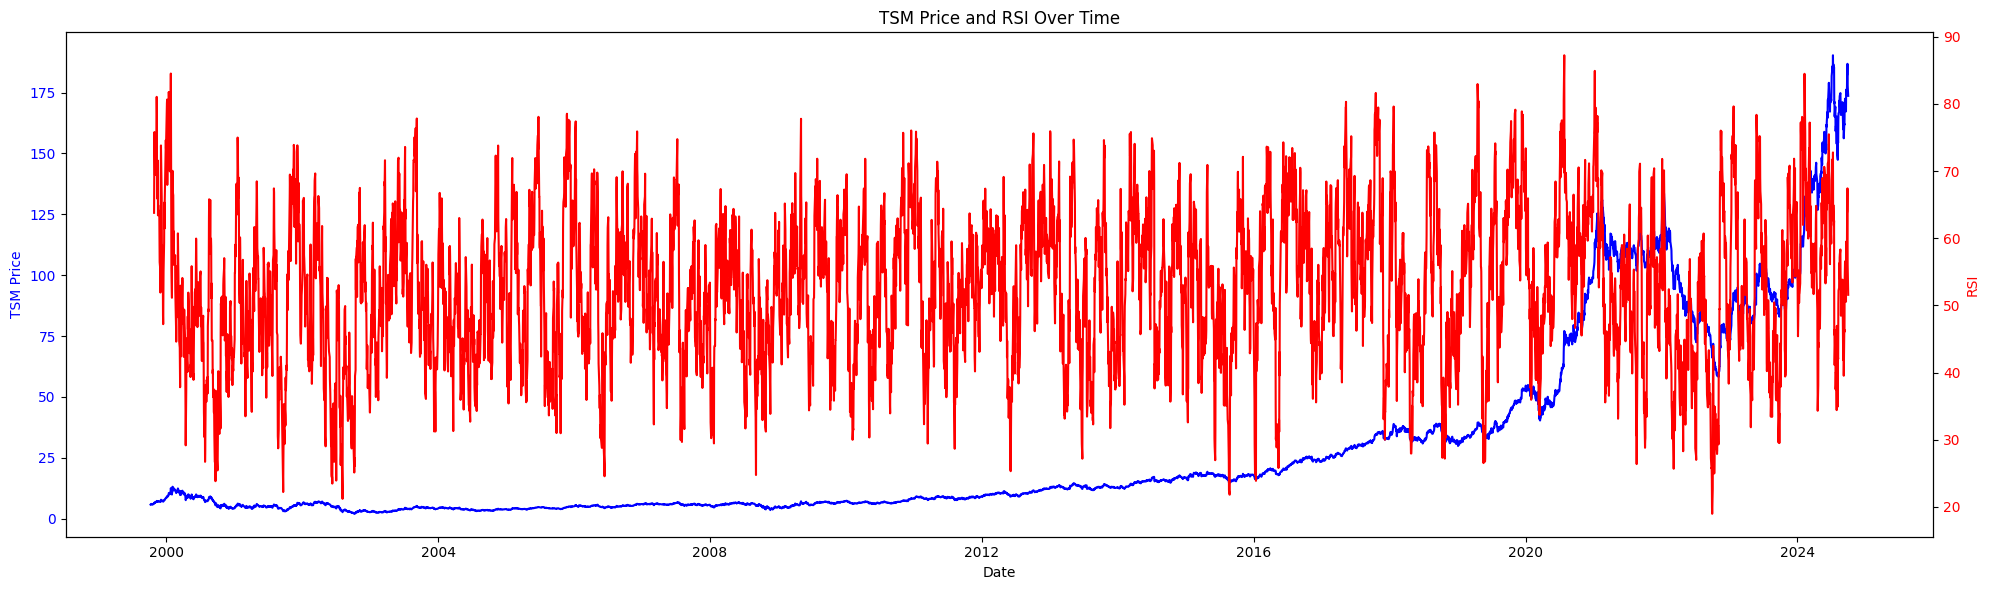

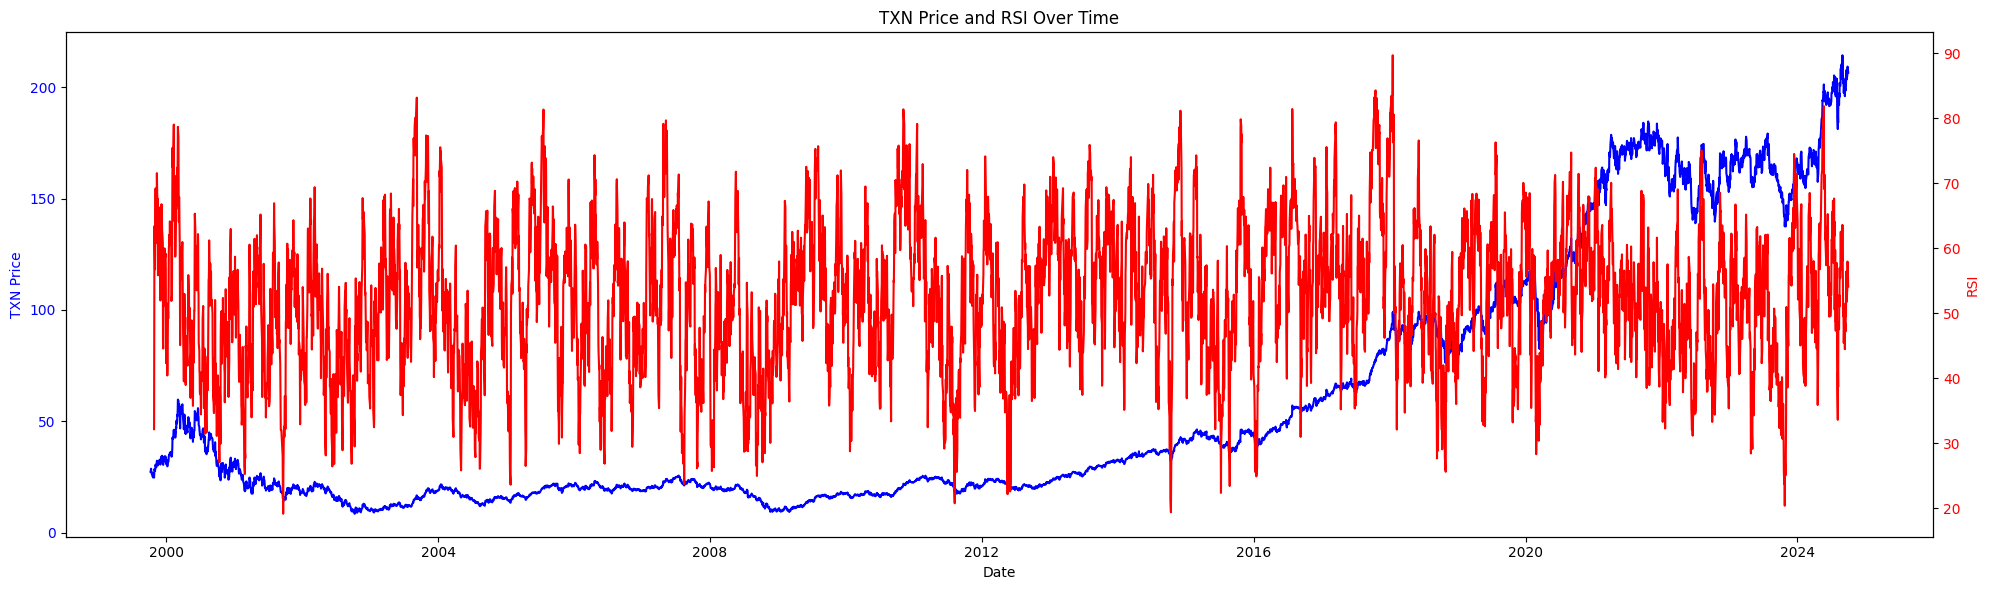

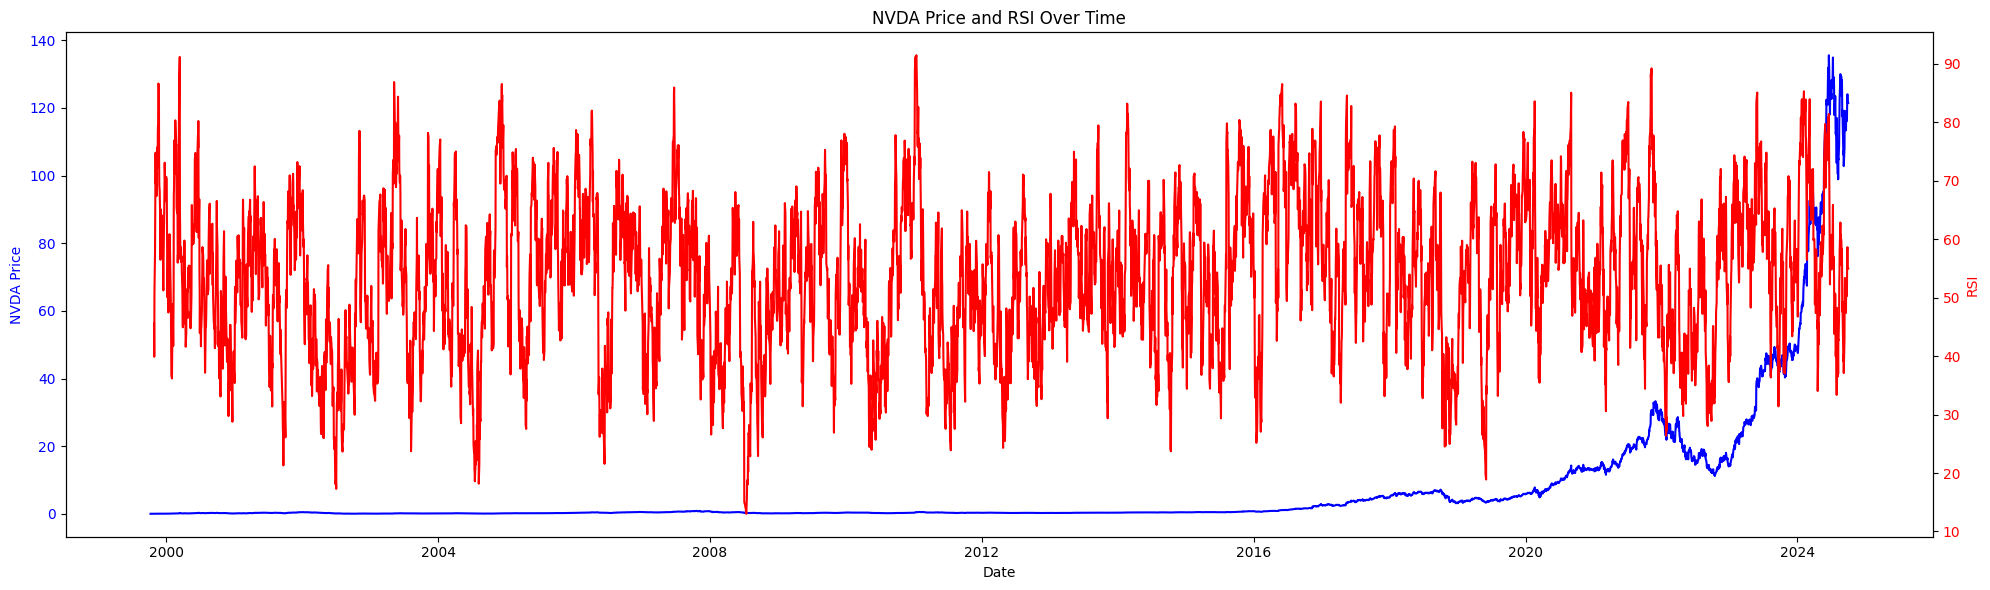

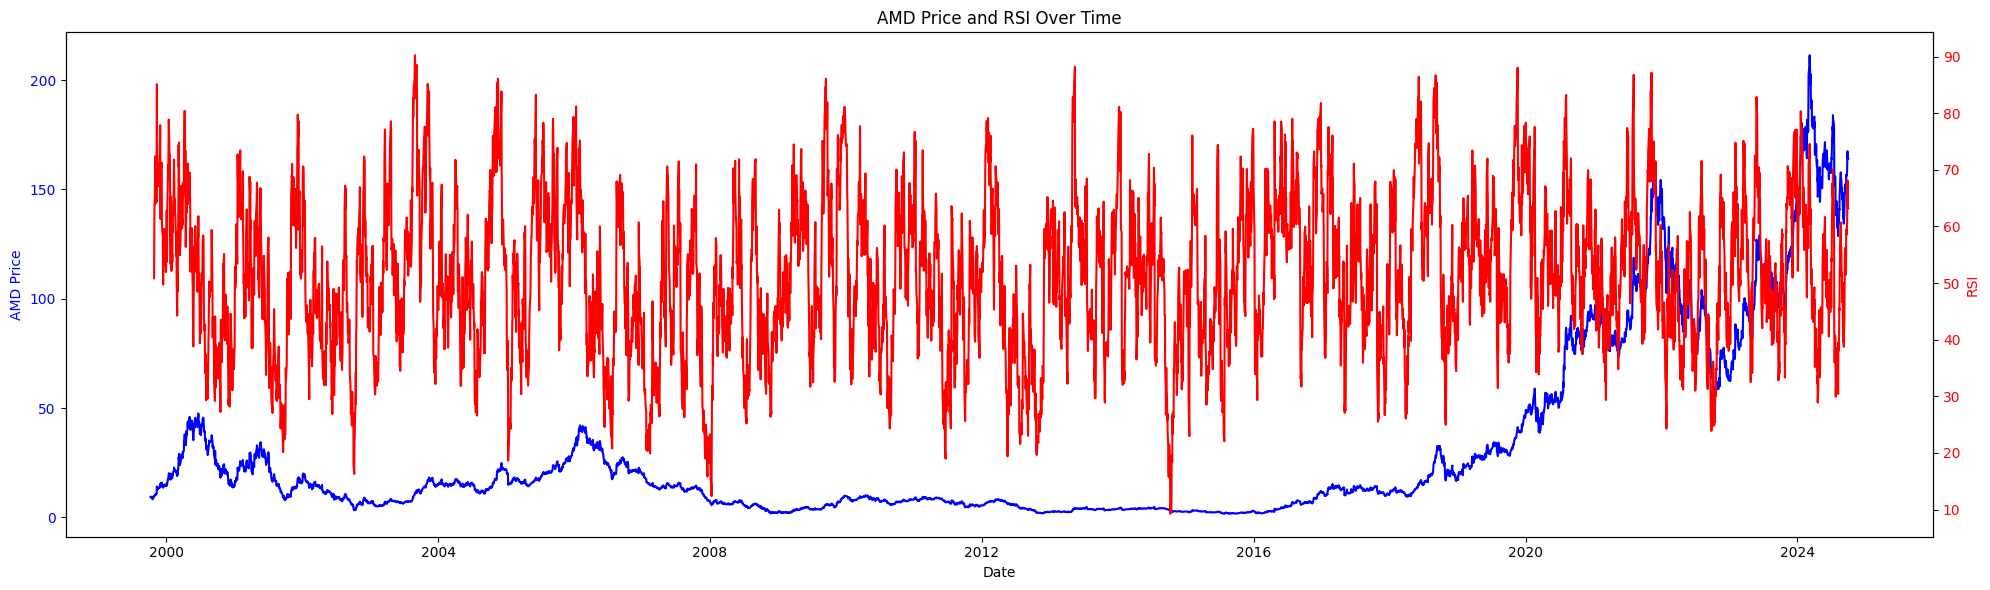

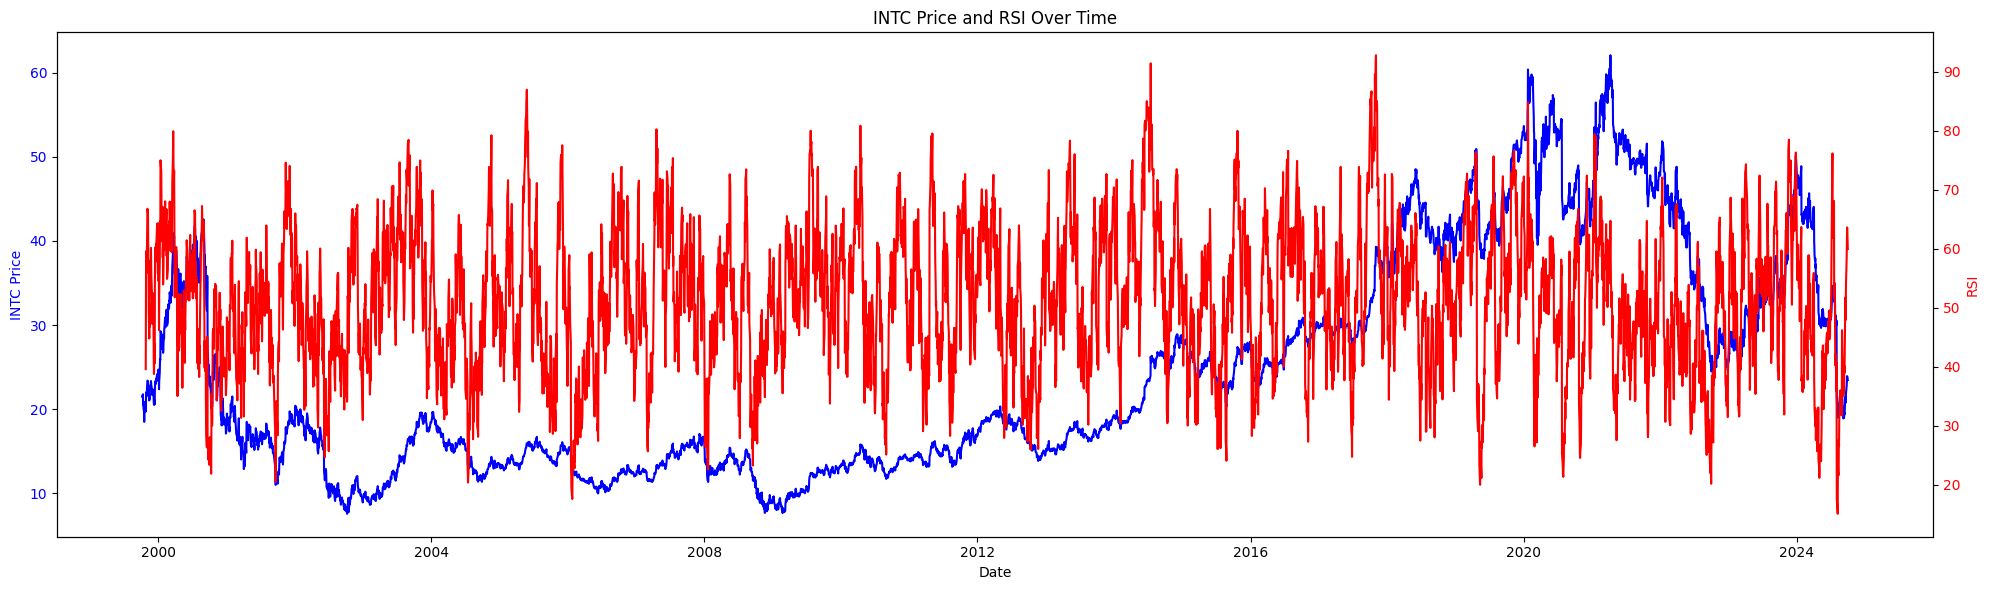

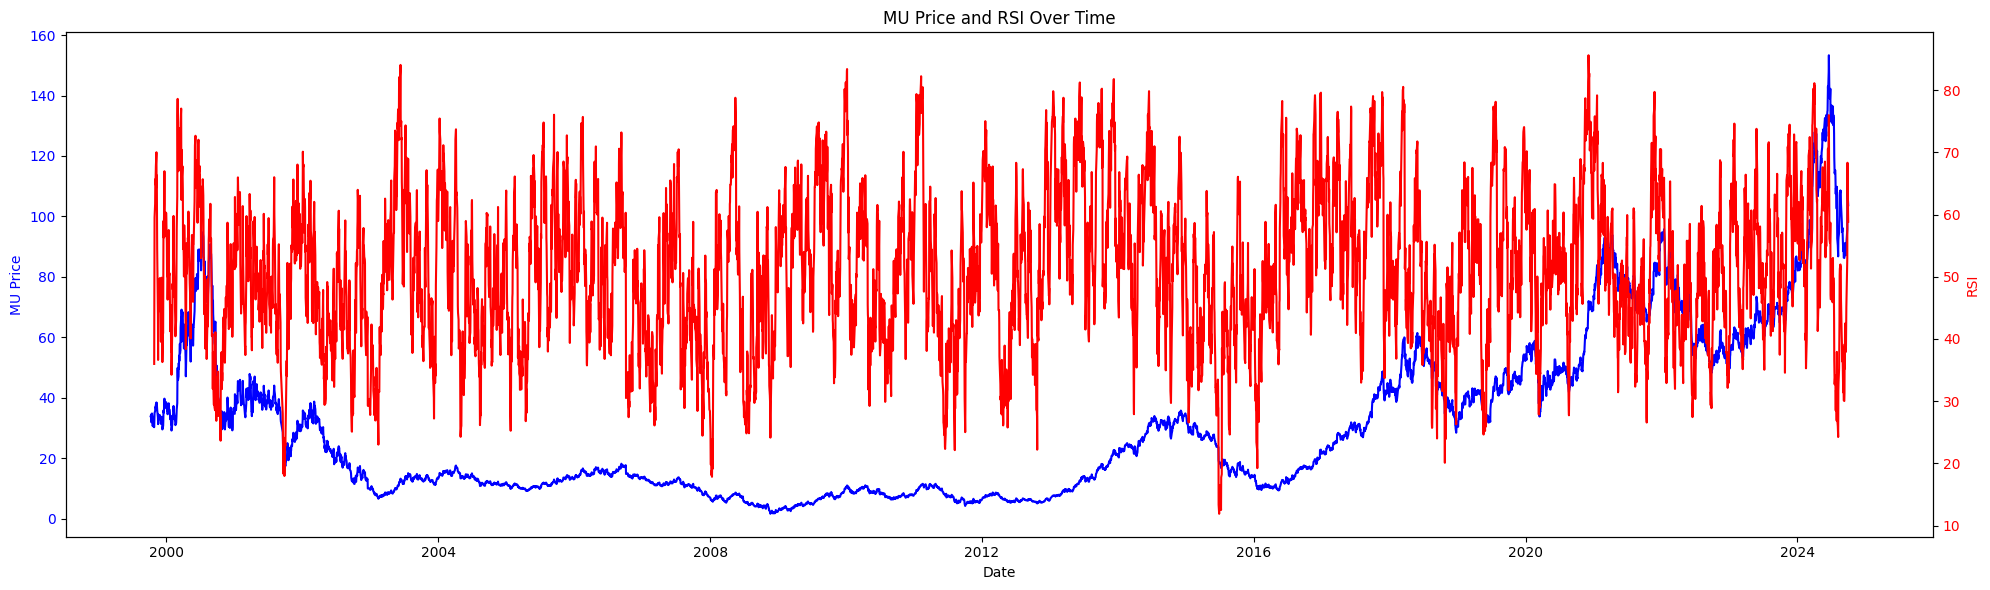

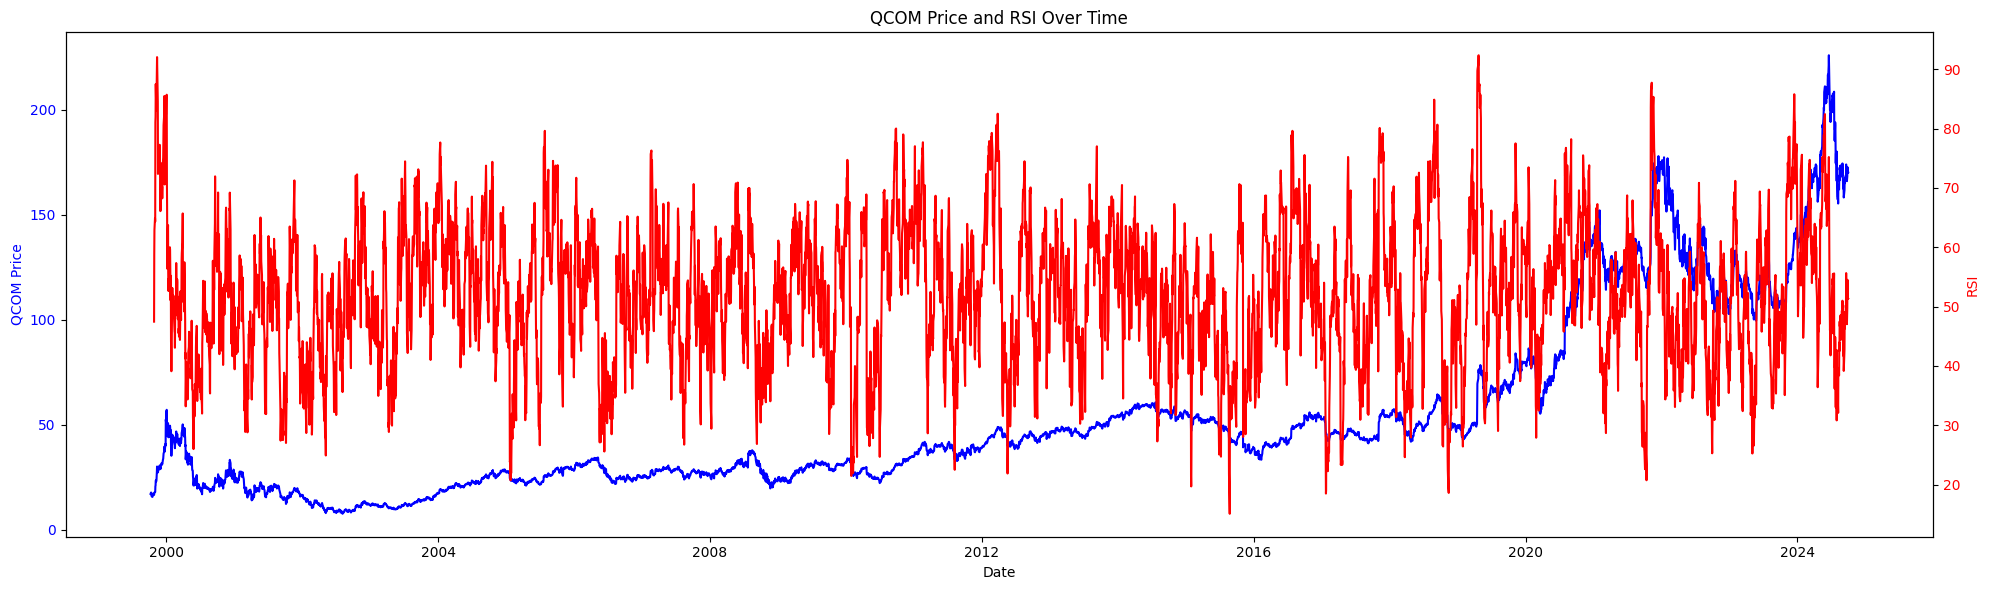

In [7]:
for s in nyse_semiconductor_symbols:
    plot_symbol_and_rsi(all_data_rsi, symbol=s)

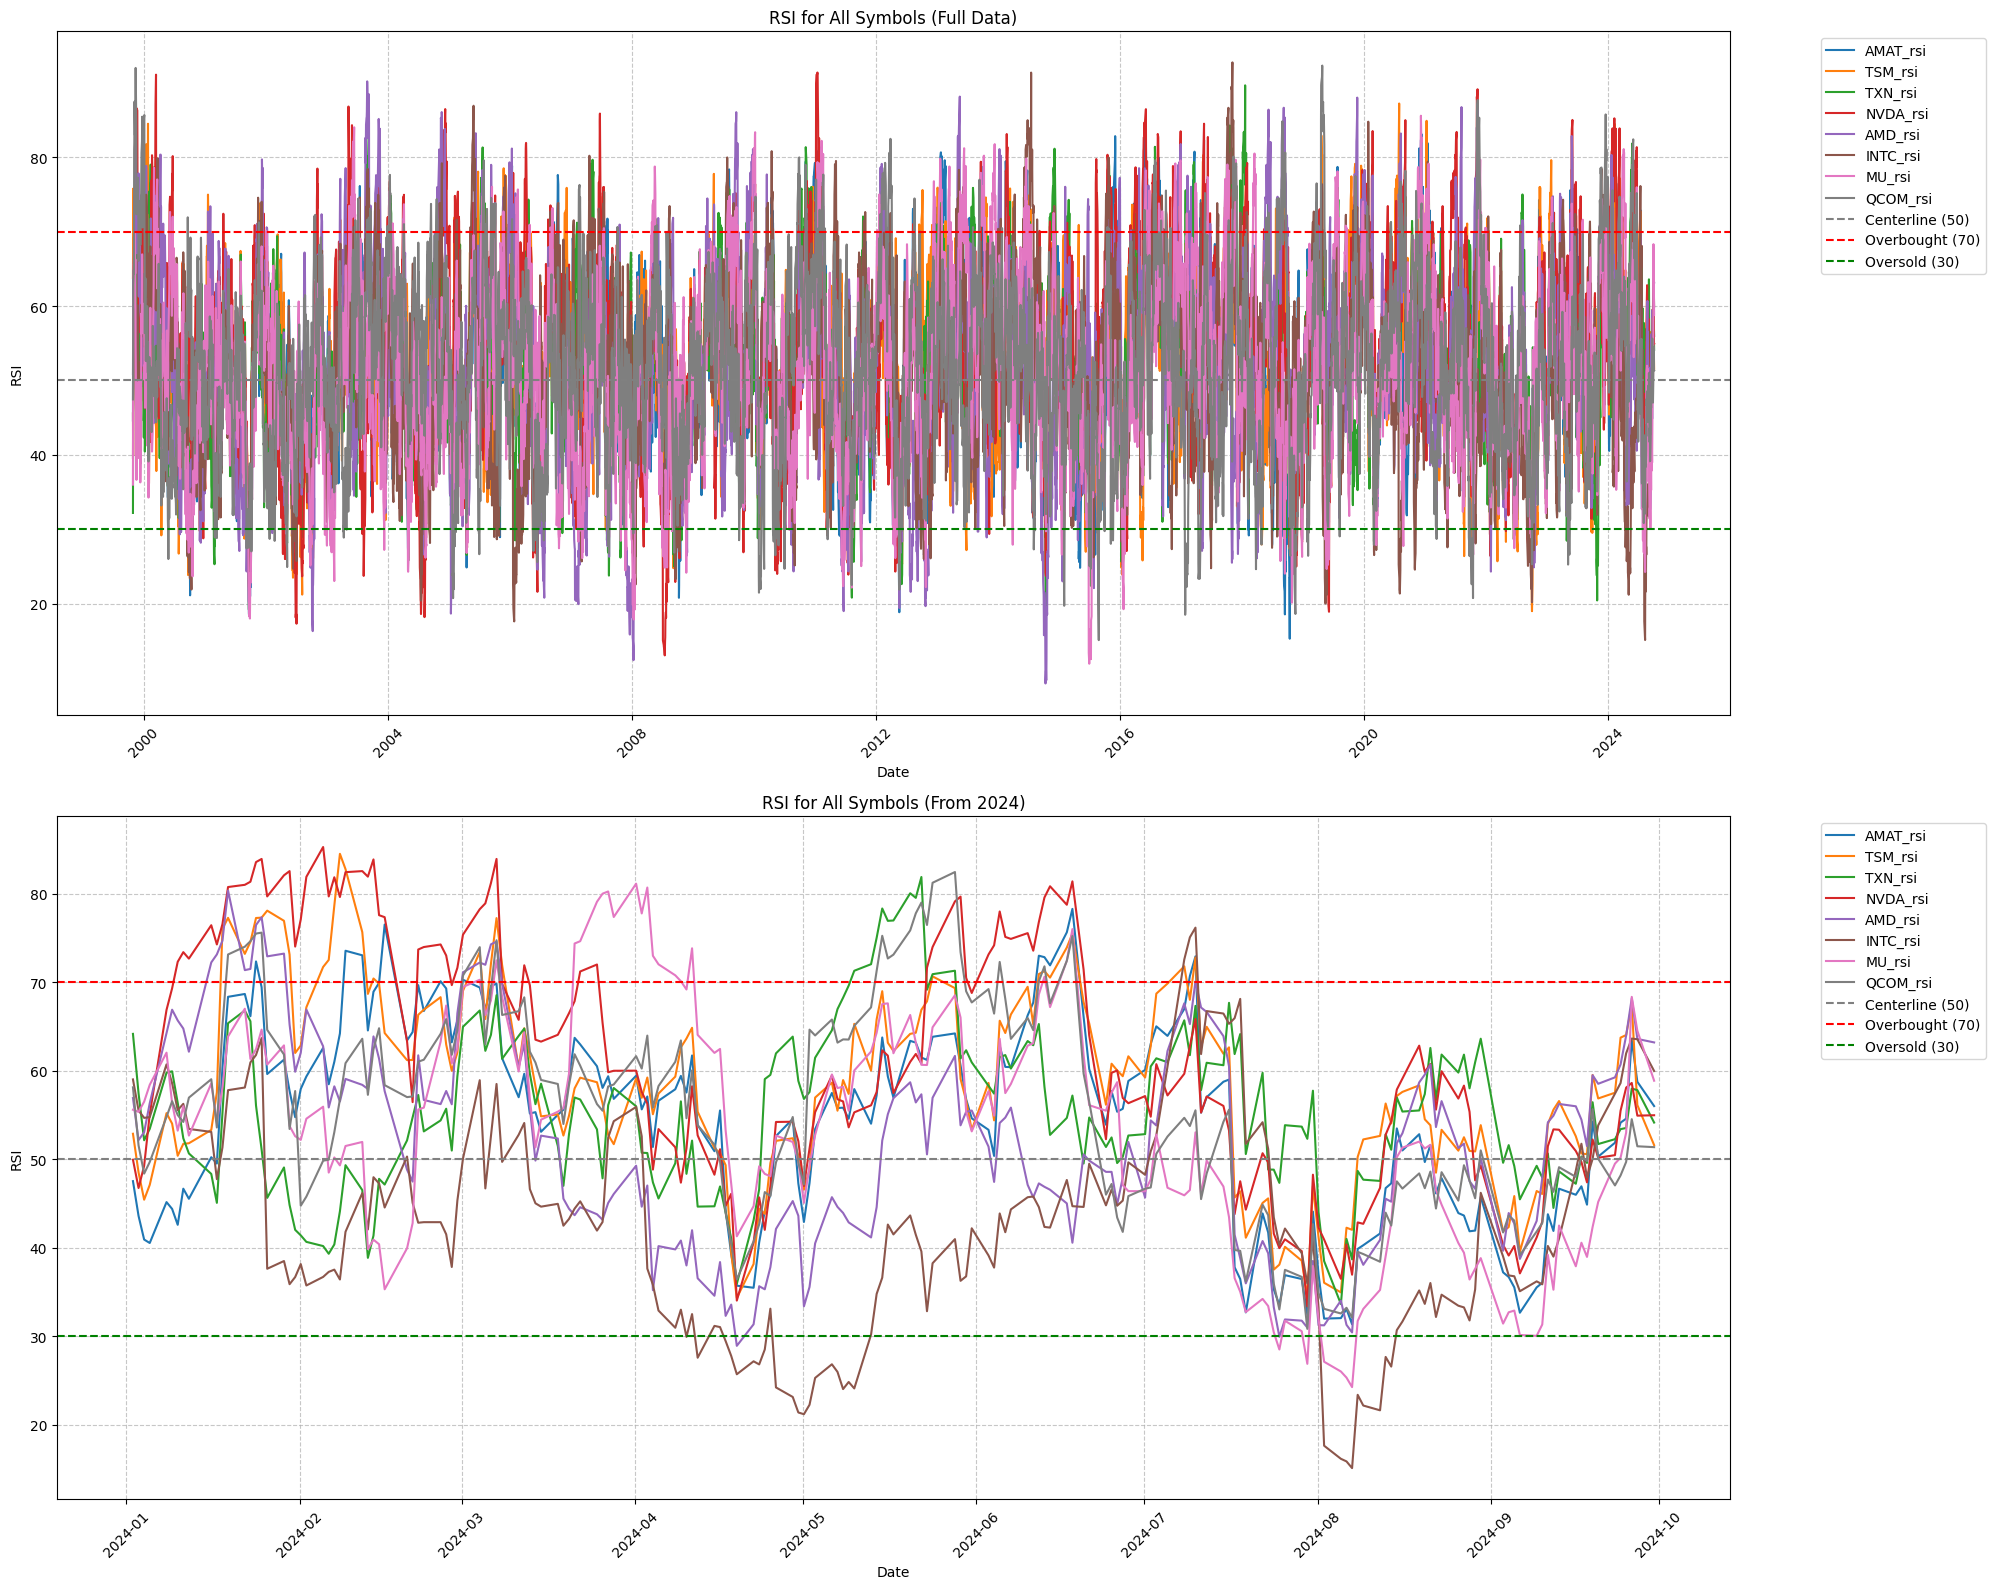

In [8]:
plot_all_rsi(all_data_rsi)

# Testing

In [9]:
all_data_rsi['total_MC'] = all_data_rsi[[f'{s}_MC' for s in nyse_semiconductor_symbols]].sum(axis=1)

for s in nyse_semiconductor_symbols:
    all_data_rsi[f'{s}_weight'] = all_data_rsi[f'{s}_MC'] / all_data_rsi['total_MC']
    all_data_rsi[f'{s}_mcweighted_rsi'] = all_data_rsi[f'{s}_rsi'] * all_data_rsi[f'{s}_weight']

all_data_rsi['all_mcweighted_rsi'] = all_data_rsi[[f'{s}_mcweighted_rsi' for s in nyse_semiconductor_symbols]].sum(axis=1)

# all_data_rsi['all_mcweighted_rsi_7dsma'] = all_data_rsi['all_mcweighted_rsi'].rolling(window=7).mean()
# all_data_rsi['MU_rsi_7dsma'] = all_data_rsi['MU_rsi'].rolling(window=7).mean()



df_strategy = all_data_rsi[['timestamp_utc', 'datetime', 'all_mcweighted_rsi', 'MU_rsi','MU_Close']].copy()
df_strategy['rsi_delta'] = df_strategy['MU_rsi'] - df_strategy['all_mcweighted_rsi']
df_strategy['returns_close'] = (df_strategy['MU_Close'] / df_strategy['MU_Close'].shift(1)) - 1
# df_strategy['rsi_14dsma_delta'] = df_strategy['rsi_delta'].rolling(window=14).mean()
# df_strategy['rsi_28dsma_delta'] = df_strategy['rsi_delta'].rolling(window=28).mean()
df_strategy

timestamp_utc                  datetime  all_mcweighted_rsi     MU_rsi  \
0      939355200000 1999-10-08 04:00:00+00:00            0.000000        NaN   
1      939614400000 1999-10-11 04:00:00+00:00            0.000000        NaN   
2      939700800000 1999-10-12 04:00:00+00:00            0.000000        NaN   
3      939787200000 1999-10-13 04:00:00+00:00            0.000000        NaN   
4      939873600000 1999-10-14 04:00:00+00:00            0.000000        NaN   
...             ...                       ...                 ...        ...   
6279  1727150400000 2024-09-24 04:00:00+00:00           56.794919  50.169405   
6280  1727236800000 2024-09-25 04:00:00+00:00           58.830159  52.982614   
6281  1727323200000 2024-09-26 04:00:00+00:00           61.056363  68.331398   
6282  1727409600000 2024-09-27 04:00:00+00:00           56.108863  64.506224   
6283  1727668800000 2024-09-30 04:00:00+00:00           54.840732  58.855958   

        MU_Close  rsi_delta  returns_close  
0      33.884476        NaN            NaN  
1      34.528435        NaN       0.019005  
2      31.921938        NaN      -0.075488  
3      32.964531        NaN       0.032661  
4      33.424507        NaN       0.013954  
...          ...        ...            ...  
6279   94.000000  -6.625514       0.004595  
6280   95.769997  -5.847545       0.018830  
6281  109.879997   7.275035       0.147332  
6282  107.500000   8.397361      -0.021660  
6283  103.709999   4.015226      -0.035256  

[6284 rows x 7 columns]

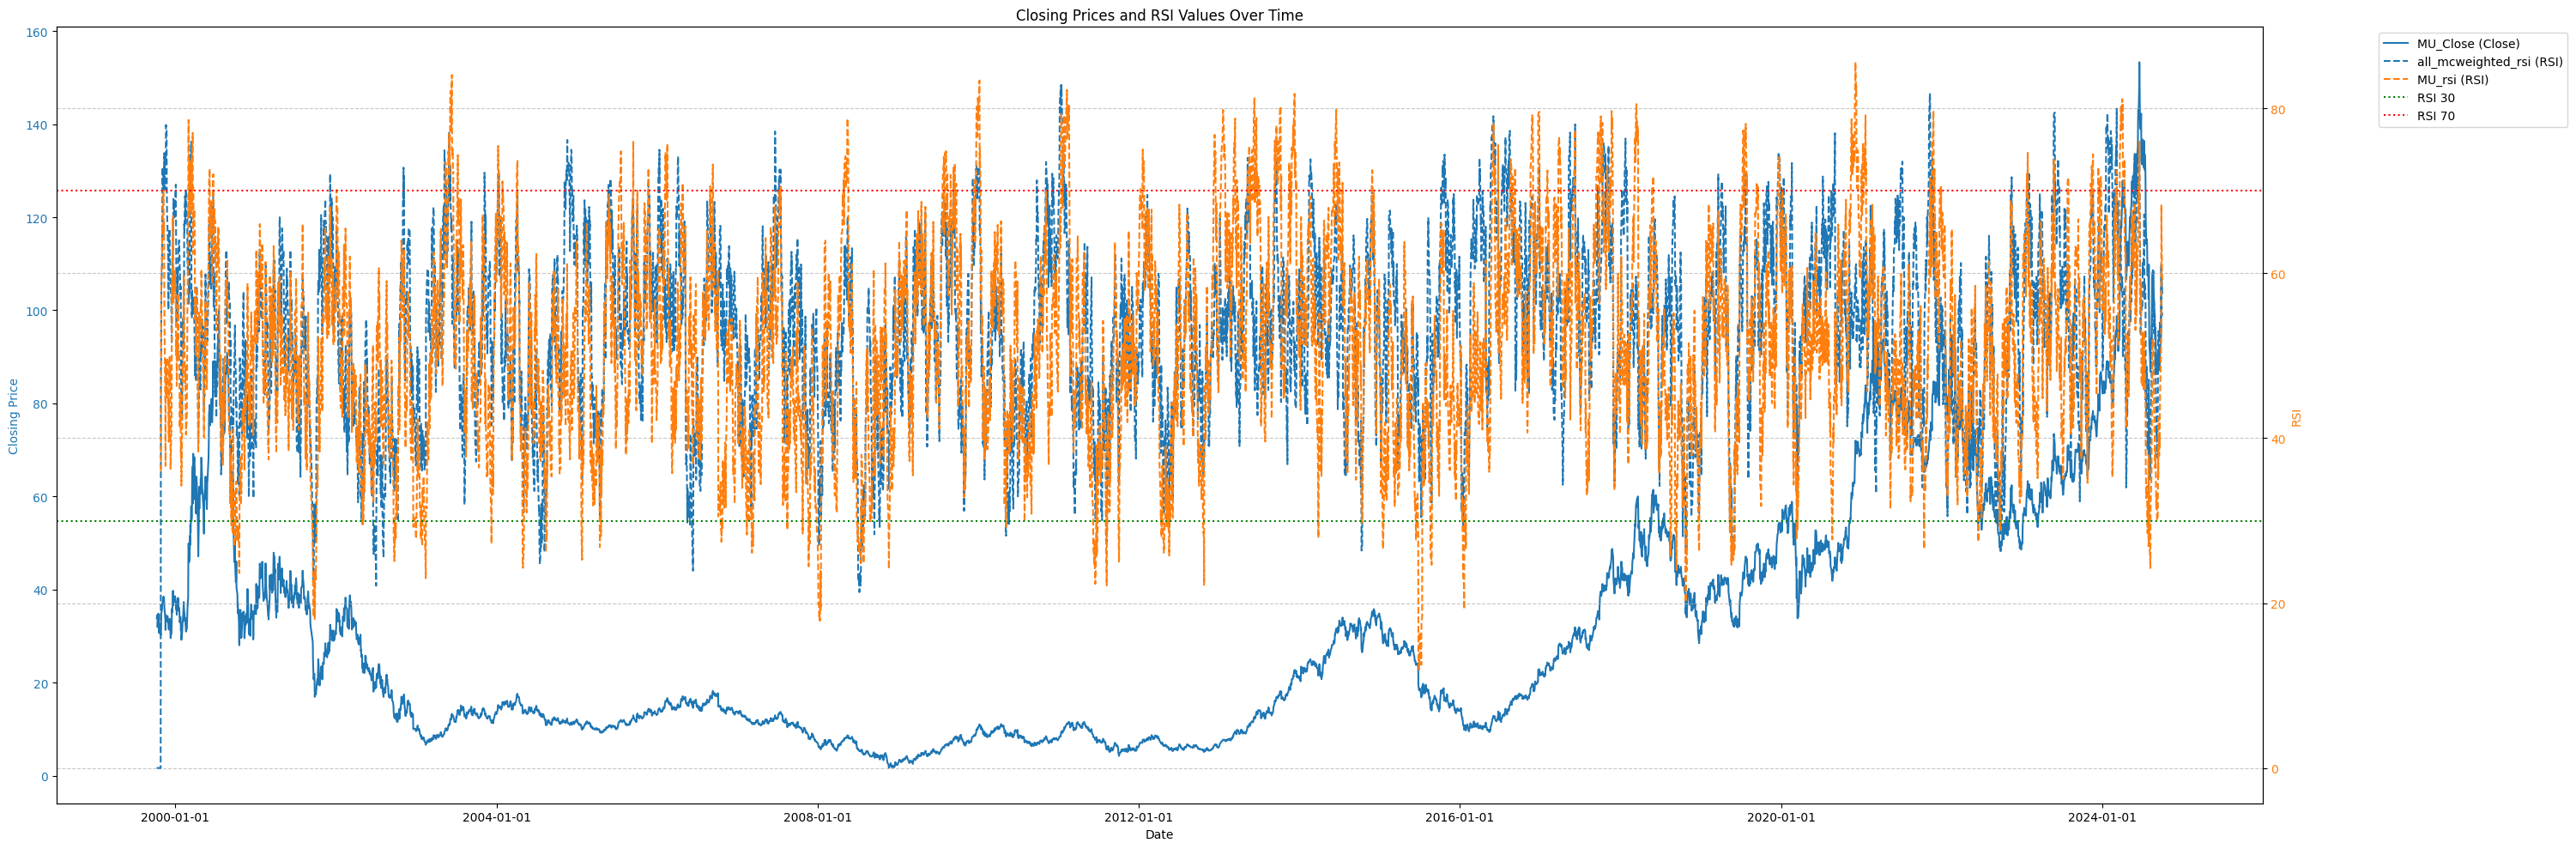

In [10]:
def plot_close_and_rsi(df):
    """
    Plot closing prices and RSI values against datetime.
    
    :param df: DataFrame containing the data with columns:
               'datetime', '*_Close', '*_rsi', 'all_mcweighted_rsi'
    """
    # Identify relevant columns
    close_columns = [col for col in df.columns if col.endswith('_Close')]
    rsi_columns = [col for col in df.columns if col.endswith('_rsi') or col == 'all_mcweighted_rsi']
    
    # Create the plot
    fig, ax1 = plt.subplots(figsize=(30, 10))
    
    # Plot closing prices on the first y-axis
    for col in close_columns:
        ax1.plot(df['datetime'], df[col], label=f'{col} (Close)')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Closing Price', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    
    # Create a second y-axis for RSI values
    ax2 = ax1.twinx()
    
    # Plot RSI values on the second y-axis
    for col in rsi_columns:
        ax2.plot(df['datetime'], df[col], label=f'{col} (RSI)', linestyle='--')
    ax2.set_ylabel('RSI', color='tab:orange')
    ax2.tick_params(axis='y', labelcolor='tab:orange')
    
    # Add RSI reference lines
    ax2.axhline(y=30, color='green', linestyle=':', label='RSI 30')
    ax2.axhline(y=70, color='red', linestyle=':', label='RSI 70')
    
    # Combine legends from both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', bbox_to_anchor=(1.05, 1))
    
    # Format the date on the x-axis
    ax1.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d"))
    plt.xticks(rotation=45)
    
    plt.title('Closing Prices and RSI Values Over Time')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_close_and_rsi(df_strategy)

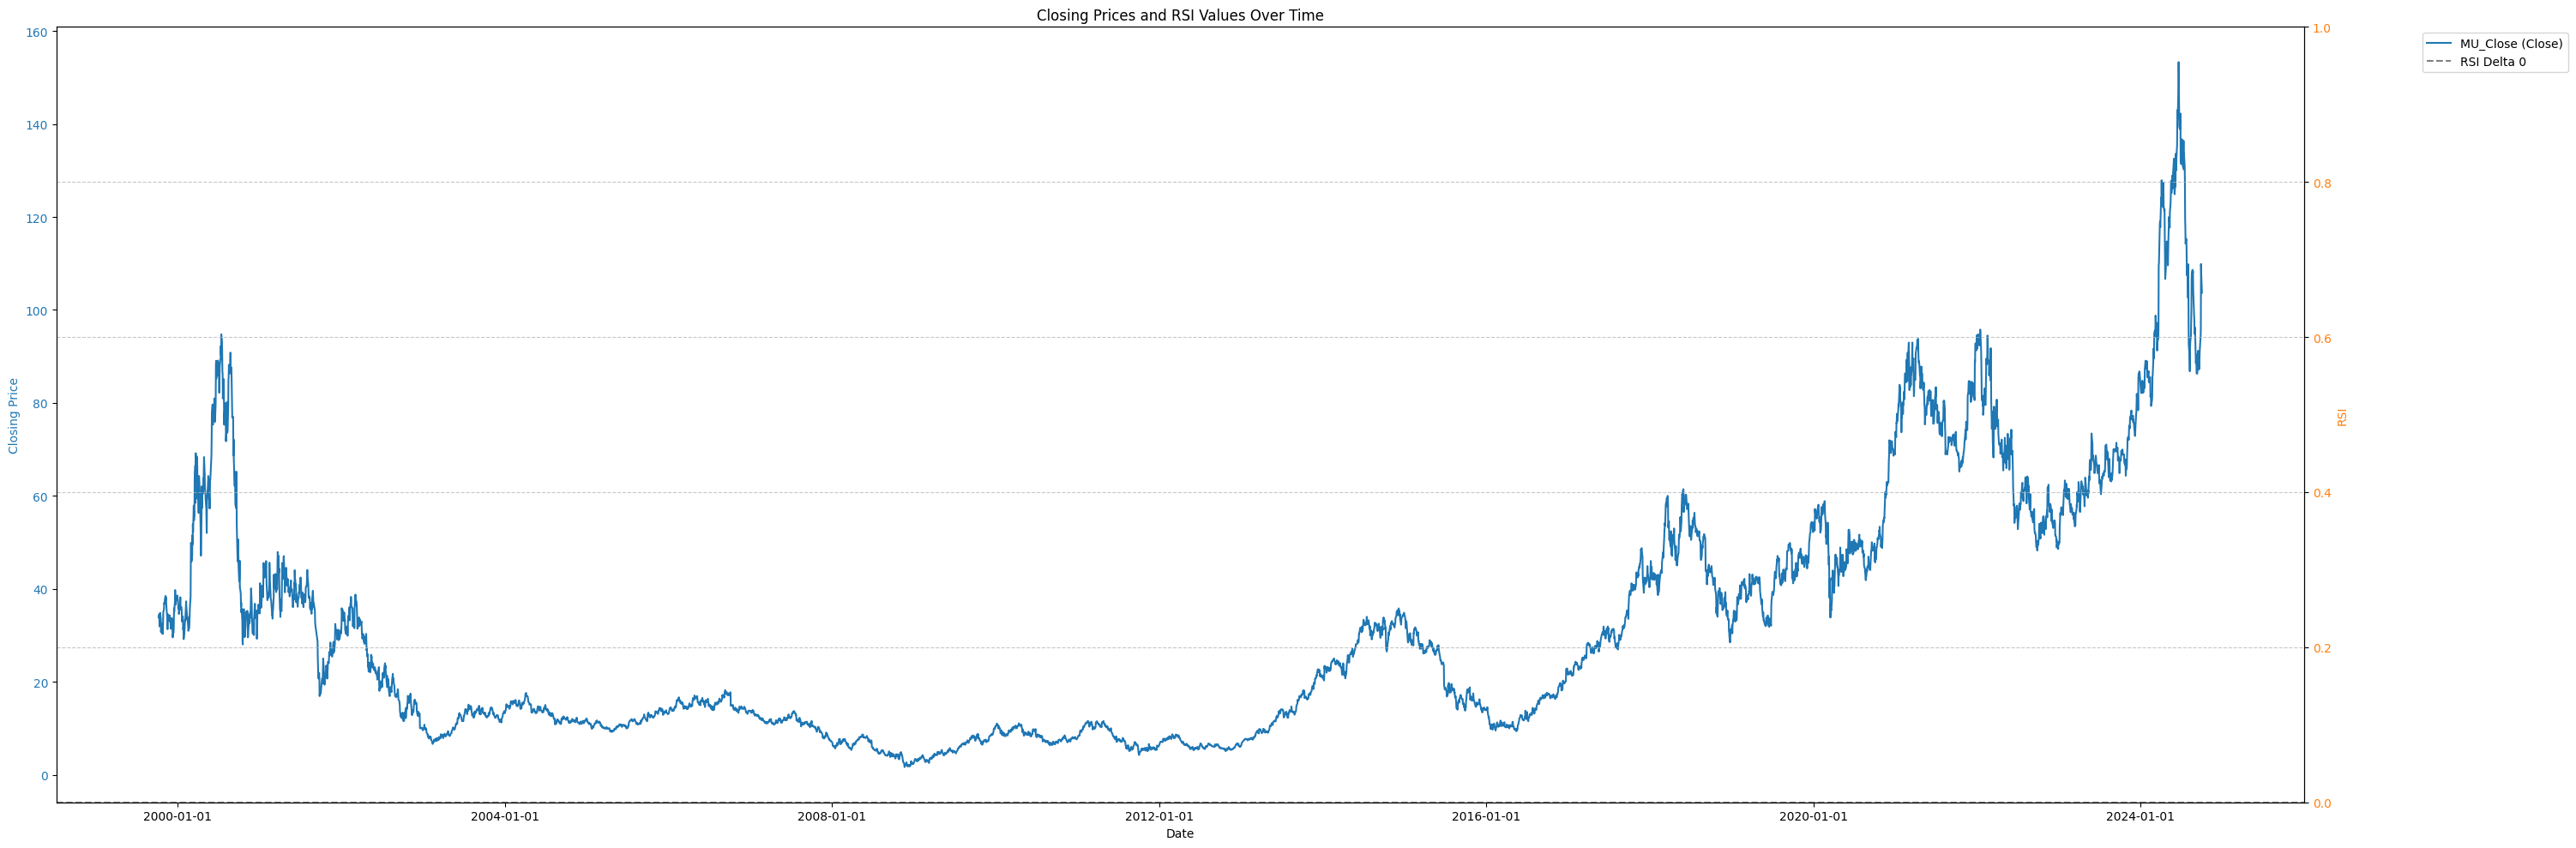

In [11]:
def plot_close_and_rsi(df):
    """
    Plot closing prices and RSI values against datetime.
    
    :param df: DataFrame containing the data with columns:
               'datetime', '*_Close', '*_rsi', 'all_mcweighted_rsi'
    """
    # Identify relevant columns
    close_columns = [col for col in df.columns if col.endswith('_Close')]
    rsi_columns = [col for col in df.columns if col.endswith('sma_delta')]
    
    # Create the plot
    fig, ax1 = plt.subplots(figsize=(30, 10))
    
    # Plot closing prices on the first y-axis
    for col in close_columns:
        ax1.plot(df['datetime'], df[col], label=f'{col} (Close)')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Closing Price', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    
    # Create a second y-axis for RSI values
    ax2 = ax1.twinx()
    
    # Plot RSI values on the second y-axis
    for col in rsi_columns:
        ax2.plot(df['datetime'], df[col], label=f'{col} (RSI)', linestyle='--', color='tab:orange')
    ax2.set_ylabel('RSI', color='tab:orange')
    ax2.tick_params(axis='y', labelcolor='tab:orange')
    ax2.axhline(y=0, color='gray', linestyle='--', label='RSI Delta 0')
    # Add RSI reference lines
    # ax2.axhline(y=30, color='green', linestyle=':', label='RSI 30')
    # ax2.axhline(y=70, color='red', linestyle=':', label='RSI 70')
    
    # Combine legends from both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', bbox_to_anchor=(1.05, 1))
    
    # Format the date on the x-axis
    ax1.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d"))
    plt.xticks(rotation=45)
    
    plt.title('Closing Prices and RSI Values Over Time')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_close_and_rsi(df_strategy)

# Strategy

## Idea
Using a marketcap-weighted RSI, we can identify come up with a measure of how oversold/overbought an industry is. Comparing a single individual stock to the RSI, the difference is then a measure of how oversold/overbought a company with reference to the industry level. 

In this context, we are using the Micron (MU) stock compared to a list of semiconductor symbols.

RSI Delta = Stock RSI - Industry RSI

1. Positive RSI Delta - Stock has stronger momentum than industry. 
2. Negative RSI Delta - Stock has weaker momentum than industry. 

## Trade
Use a SMA / EMA to measure the average.
- Long - Avg < Lower Threshold of -10
- Short - Avg > Upper Threshold of 10

### Benchmark

In [12]:
df_benchmark = prepare_data(symbol='MU', start_date=start_date, end_date=end_date, interval=interval)
df_benchmark

Date        Open        High         Low  \
0    1999-10-08 00:00:00-04:00   33.485835   34.773752   31.891271   
1    1999-10-11 00:00:00-04:00   34.467105   35.264387   34.191123   
2    1999-10-12 00:00:00-04:00   34.835083   35.509706   31.921938   
3    1999-10-13 00:00:00-04:00   33.240513   34.037795   32.443231   
4    1999-10-14 00:00:00-04:00   32.964537   33.608495   32.259249   
...                        ...         ...         ...         ...   
6279 2024-09-24 00:00:00-04:00   94.730003   95.000000   92.760002   
6280 2024-09-25 00:00:00-04:00   94.160004   96.180000   93.930000   
6281 2024-09-26 00:00:00-04:00  113.099998  114.800003  107.529999   
6282 2024-09-27 00:00:00-04:00  110.500000  110.970001  107.029999   
6283 2024-09-30 00:00:00-04:00  106.080002  106.750000  102.260002   

           Close     Volume  Dividends  Stock Splits  timestamp_utc  \
0      33.884476   26879000        0.0           0.0   939355200000   
1      34.528435    9679000        0.0           0.0   939614400000   
2      31.921938   18017200        0.0           0.0   939700800000   
3      32.964531   20678600        0.0           0.0   939787200000   
4      33.424507   10512400        0.0           0.0   939873600000   
...          ...        ...        ...           ...            ...   
6279   94.000000   23043200        0.0           0.0  1727150400000   
6280   95.769997   54762900        0.0           0.0  1727236800000   
6281  109.879997  107965900        0.0           0.0  1727323200000   
6282  107.500000   42960200        0.0           0.0  1727409600000   
6283  103.709999   39544700        0.0           0.0  1727668800000   

      returns_close  logreturns_close            MC  
0               NaN               NaN  114997788672  
1          0.019005          0.018826  114997788672  
2         -0.075488         -0.078490  114997788672  
3          0.032661          0.032139  114997788672  
4          0.013954          0.013857  114997788672  
...             ...               ...           ...  
6279       0.004595          0.004585  114997788672  
6280       0.018830          0.018655  114997788672  
6281       0.147332          0.137439  114997788672  
6282      -0.021660         -0.021898  114997788672  
6283      -0.035256         -0.035892  114997788672  

[6284 rows x 12 columns]

In [13]:
from evaluate_strategy import get_performance, plot_performance
from itertools import product


spans = [5, 10, 15, 20, 25, 30]
limits = [5, 7.5, 10, 15]

optimization_params = product(spans, limits, limits)

optimization_results = []

for s, ul, ll in optimization_params:
    df_strategy_test = df_strategy.copy()
    df_strategy_test['rsi_delta_ema'] = df_strategy_test['rsi_delta'].ewm(span=s).mean()
    df_strategy_test['signal'] = 0
    df_strategy_test['signal'] = np.where(df_strategy_test['rsi_delta_ema'] > ul, -1, np.where(df_strategy_test['rsi_delta_ema'] < -ll, 1, 0))

    performance, trades = get_performance(df_strategy = df_strategy_test,
                                          df_benchmark=df_benchmark,
                                          strategy_price_column='MU_Close',
                                          strategy_returns_column='returns_close')
    performance.update({
        'span': s,
        'upper_limit': ul,
        'lower_limit': -ll
    })
    optimization_results.append(performance)
    print(f"Span: {s}, Upper Limit: {ul}, Lower Limit: -{ll}, performance: {performance['number_of_trades']}, {round(performance['win_rate'], 2)}")

Span: 5, Upper Limit: 5, Lower Limit: -5, performance: 260, 0.63
Span: 5, Upper Limit: 5, Lower Limit: -7.5, performance: 245, 0.63
Span: 5, Upper Limit: 5, Lower Limit: -10, performance: 234, 0.65
Span: 5, Upper Limit: 5, Lower Limit: -15, performance: 186, 0.62
Span: 5, Upper Limit: 7.5, Lower Limit: -5, performance: 233, 0.64
Span: 5, Upper Limit: 7.5, Lower Limit: -7.5, performance: 218, 0.64
Span: 5, Upper Limit: 7.5, Lower Limit: -10, performance: 207, 0.66
Span: 5, Upper Limit: 7.5, Lower Limit: -15, performance: 159, 0.64
Span: 5, Upper Limit: 10, Lower Limit: -5, performance: 212, 0.61
Span: 5, Upper Limit: 10, Lower Limit: -7.5, performance: 197, 0.62
Span: 5, Upper Limit: 10, Lower Limit: -10, performance: 186, 0.63
Span: 5, Upper Limit: 10, Lower Limit: -15, performance: 138, 0.6
Span: 5, Upper Limit: 15, Lower Limit: -5, performance: 182, 0.58
Span: 5, Upper Limit: 15, Lower Limit: -7.5, performance: 167, 0.59
Span: 5, Upper Limit: 15, Lower Limit: -10, performance: 156, 0

In [14]:
df_optimization_results = pd.DataFrame(optimization_results).sort_values(by='annualized_sharpe', ascending=False)
df_optimization_results

number_of_trades  win_rate  reward_risk_ratio  expectancy  \
42               109   0.65138           0.890027    0.741664   
26               130   0.66923           0.683687    0.435190   
30               106   0.63208           0.757175    0.341451   
90                68   0.60294           1.385623    1.160582   
46                83   0.65060           0.787992    0.563697   
..               ...       ...                ...         ...   
3                186   0.62366           0.748673    0.181918   
35                96   0.65625           0.864127    0.536653   
23                99   0.60606           0.871308    0.309262   
67                67   0.58209           1.028852    0.573597   
19               124   0.62097           0.787000    0.274924   

           avg_trade_duration      beta     alpha  max_drawdown  \
42 21 days 16:03:51.192660550  0.085746  0.105422     -0.588505   
26 19 days 23:02:46.153846153  0.086113  0.103275     -0.525626   
30 18 days 16:03:23.773584905  0.148887  0.079827     -0.478085   
90 26 days 07:23:49.411764706  0.099166  0.076655     -0.495749   
46 21 days 07:31:48.433734939  0.141191  0.073186     -0.522141   
..                        ...       ...       ...           ...   
3  15 days 16:14:30.967741935 -0.158792  0.001687     -0.732328   
35    25 days 03:26:52.500000 -0.154119 -0.004166     -0.834010   
23 19 days 22:00:36.363636363 -0.089701 -0.007244     -0.826630   
67 30 days 20:44:46.567164179 -0.148557 -0.008266     -0.849082   
19 21 days 04:01:27.096774193 -0.160664 -0.030791     -0.896677   

    annualized_sharpe  annualized_sortino  ...  annualized_treynor  \
42         105.323145           82.260373  ...            1.275361   
26          98.472294           80.708127  ...            1.245183   
30          92.363302           66.872990  ...            0.582038   
90          90.756741           62.037698  ...            0.818875   
46          88.593988           61.389262  ...            0.564227   
..                ...                 ...  ...                 ...   
3           -4.712423           -3.696068  ...            0.035257   
35         -10.474434           -7.744079  ...            0.072911   
23         -11.578963           -7.343985  ...            0.126642   
67         -15.336078          -10.589915  ...            0.101521   
19         -33.356627          -24.467480  ...            0.237532   

    annualized_information  omega_ratio  profit_factor  recovery_factor  VaR  \
42                1.767052     1.203340       1.203340        20.903774  NaN   
26                1.690654     1.185391       1.185391        22.219993  NaN   
30                1.237770     1.198584       1.198584        14.524137  NaN   
90                1.025080     1.200289       1.200289        12.117422  NaN   
46                1.025069     1.202442       1.202442        11.036043  NaN   
..                     ...          ...            ...              ...  ...   
3                -1.158202     1.042361       1.042361        -0.178394  NaN   
35               -1.310907     1.032362       1.032362        -0.294450  NaN   
23               -1.391323     1.030549       1.030549        -0.299905  NaN   
67               -1.421791     1.023230       1.023230        -0.371484  NaN   
19               -1.901086     1.003560       1.003560        -0.692584  NaN   

    CVaR  span  upper_limit  lower_limit  
42   NaN    15         10.0        -10.0  
26   NaN    10         10.0        -10.0  
30   NaN    10         15.0        -10.0  
90   NaN    30         10.0        -10.0  
46   NaN    15         15.0        -10.0  
..   ...   ...          ...          ...  
3    NaN     5          5.0        -15.0  
35   NaN    15          5.0        -15.0  
23   NaN    10          7.5        -15.0  
67   NaN    25          5.0        -15.0  
19   NaN    10          5.0        -15.0  

[96 rows x 21 columns]

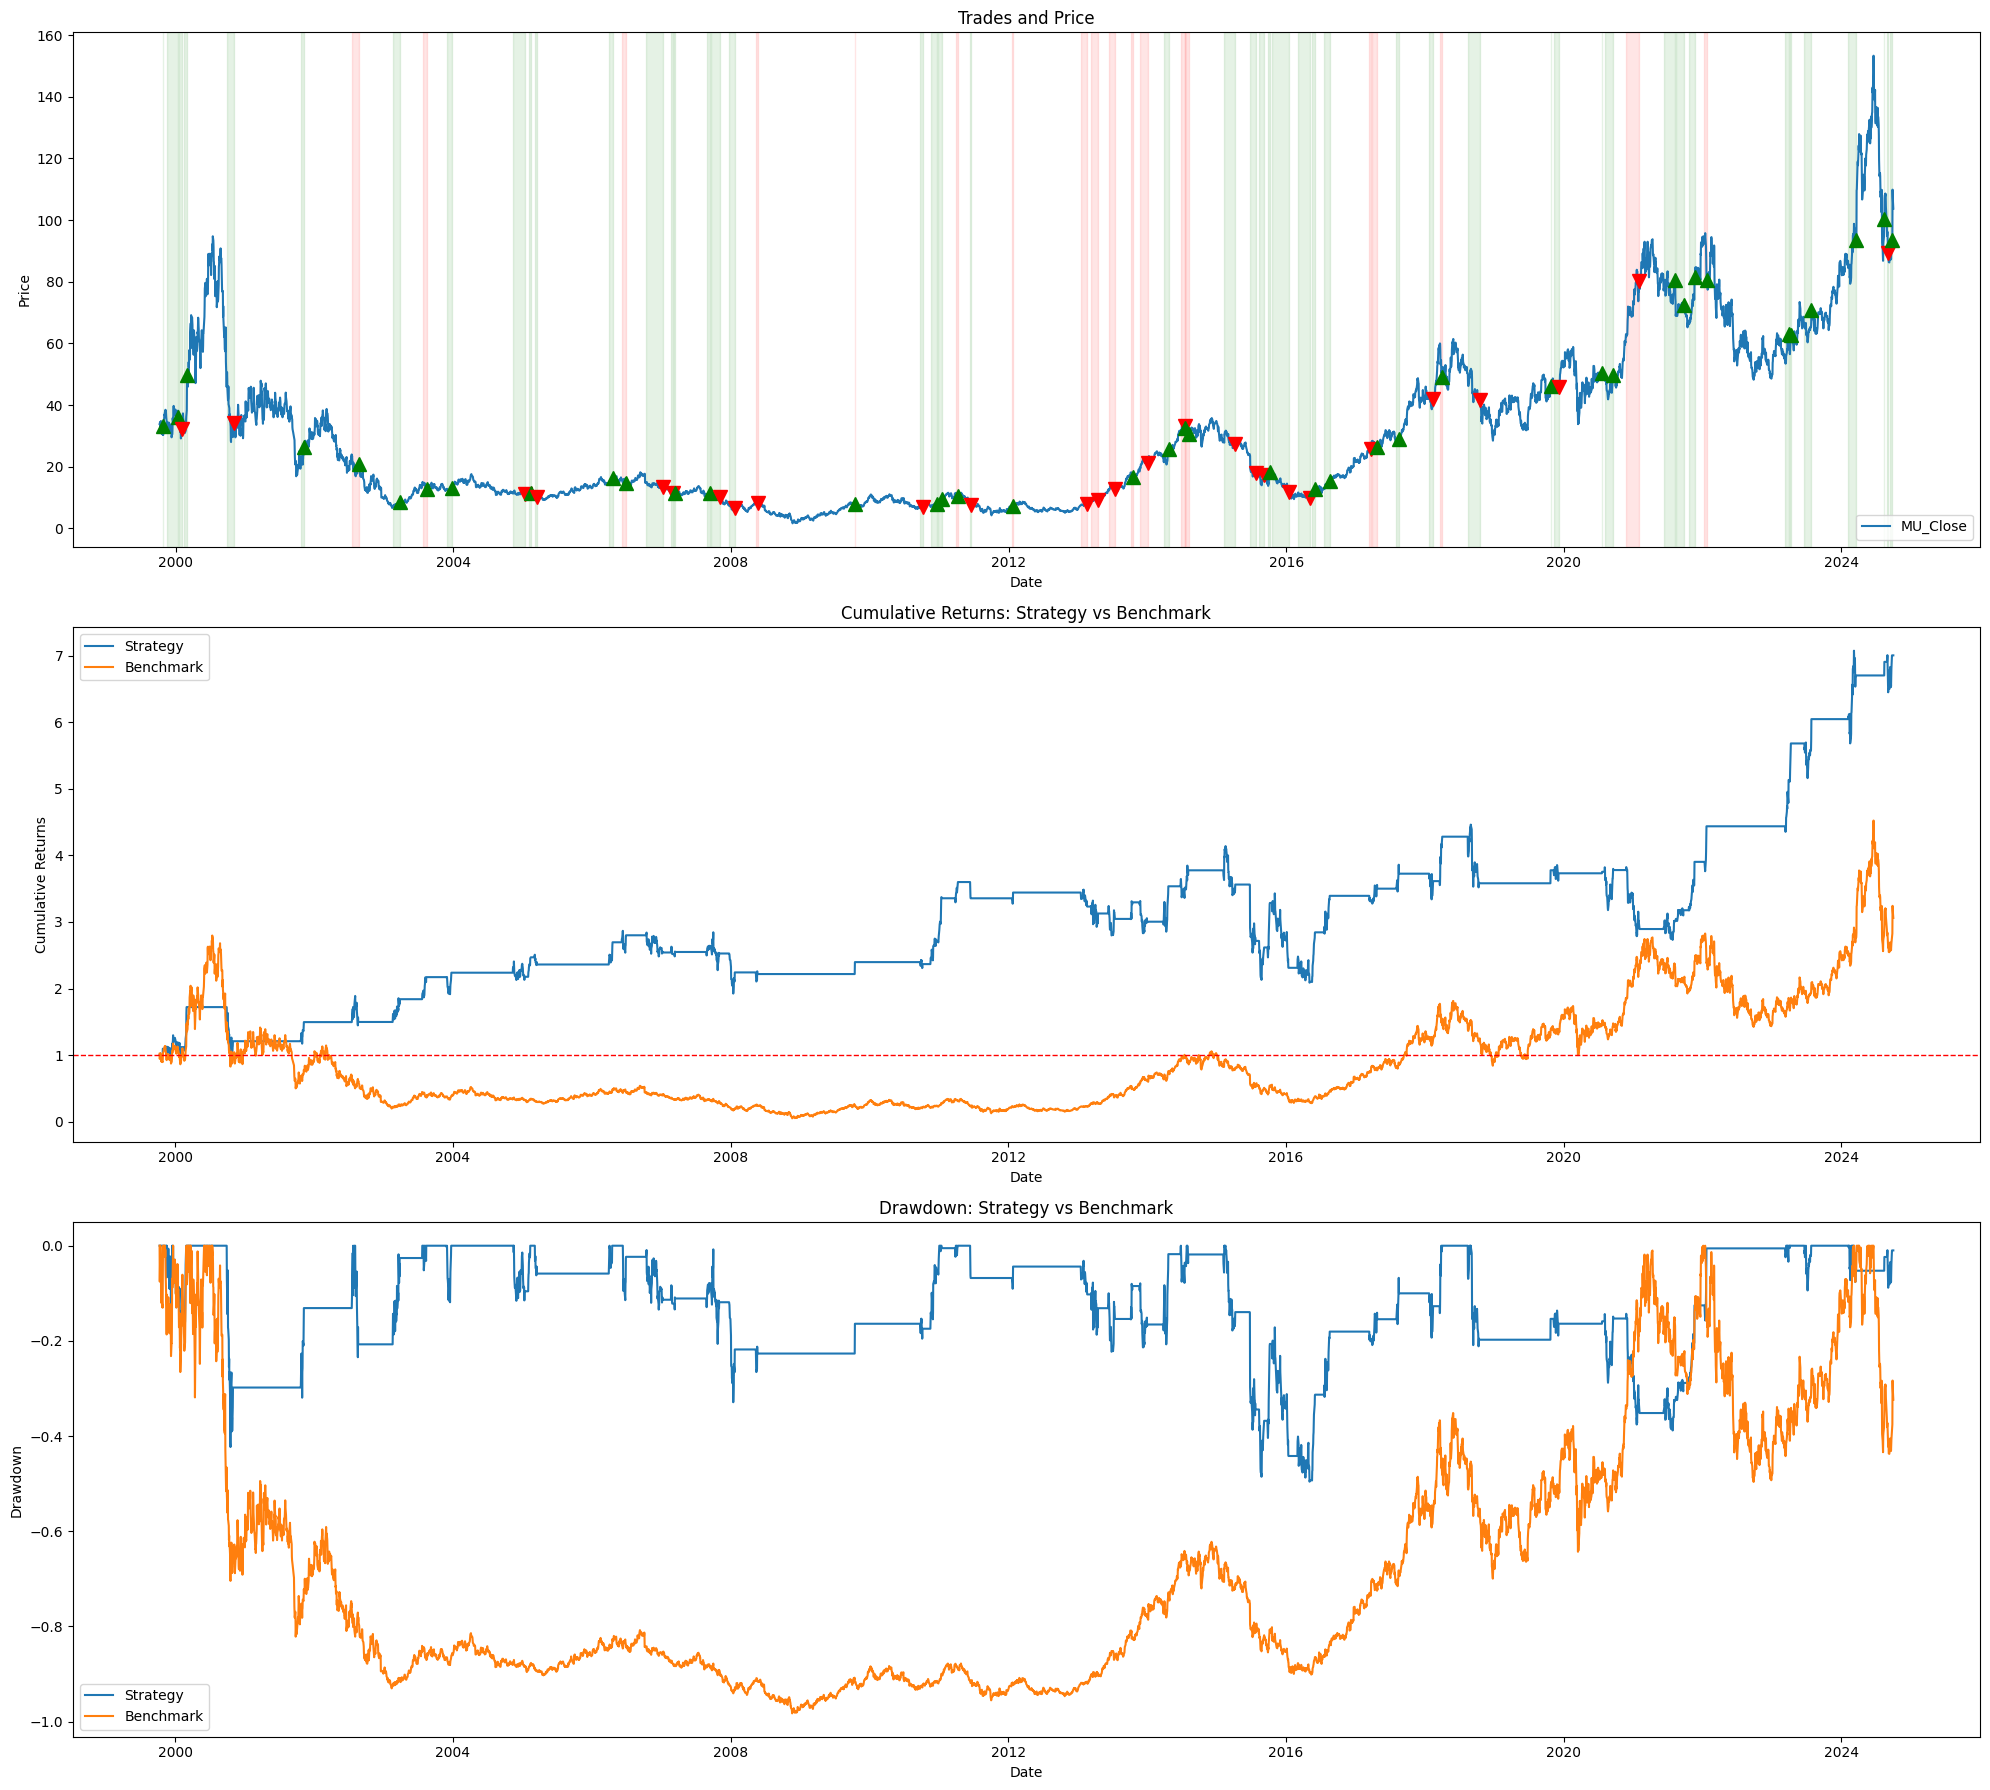

{'number_of_trades': 68,
 'win_rate': 0.60294,
 'reward_risk_ratio': 1.3856229819040404,
 'expectancy': 1.1605817528791957,
 'avg_trade_duration': Timedelta('26 days 07:23:49.411764706'),
 'beta': 0.09916601490050535,
 'alpha': 0.07665475362411708,
 'max_drawdown': -0.49574850547028526,
 'annualized_sharpe': 90.75674130268379,
 'annualized_sortino': 62.037698155053036,
 'annualized_calmar': 0.16380198547376731,
 'annualized_treynor': 0.8188751920016069,
 'annualized_information': 1.0250803518672982,
 'omega_ratio': 1.200288596269051,
 'profit_factor': 1.2002885962690508,
 'recovery_factor': 12.11742199272755,
 'VaR': nan,
 'CVaR': nan}

In [15]:
p1 = {
    'span': 15,
    'ul' : 10,
    'll' : 10
}
def test_strategy(df_strategy, df_benchmark, params):
    df_strategy_test = df_strategy.copy()
    df_strategy_test['rsi_delta_ema'] = df_strategy_test['rsi_delta'].ewm(span=s).mean()
    df_strategy_test['signal'] = 0
    df_strategy_test['signal'] = np.where(df_strategy_test['rsi_delta_ema'] > params['ul'], -1, np.where(df_strategy_test['rsi_delta_ema'] < -params['ll'], 1, 0))

    performance, trades = get_performance(df_strategy = df_strategy_test,
                                          df_benchmark=df_benchmark,
                                          strategy_price_column='MU_Close',
                                          strategy_returns_column='returns_close')
    plot_performance(df_strategy=df_strategy_test, df_benchmark=df_benchmark, trades=trades, strategy_price_column='MU_Close', strategy_returns_column='returns_strategy', benchmark_returns_column='returns_close')
    return performance, trades

r1, t1 = test_strategy(df_strategy, df_benchmark, p1)
r1

# Robustness Analysis

In [23]:
df_optimization_results['avg_trade_duration']

42   21 days 16:03:51.192660550
26   19 days 23:02:46.153846153
30   18 days 16:03:23.773584905
90   26 days 07:23:49.411764706
46   21 days 07:31:48.433734939
                ...            
3    15 days 16:14:30.967741935
35      25 days 03:26:52.500000
23   19 days 22:00:36.363636363
67   30 days 20:44:46.567164179
19   21 days 04:01:27.096774193
Name: avg_trade_duration, Length: 96, dtype: timedelta64[ns]

In [34]:
import seaborn as sns
from scipy import stats

def add_best_fit_line(ax, x, y):
    """
    Add a best fit line to an existing scatter plot and return correlation info.
    
    :param ax: matplotlib axis object
    :param x: x-values
    :param y: y-values
    :return: tuple containing (r_value, p_value)
    """
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    line = slope * x + intercept
    ax.plot(x, line, color='r', linestyle='--', 
            label=f'Best Fit (R² = {r_value**2:.2f}, r = {r_value:.2f})')
    
    # Determine correlation strength
    if abs(r_value) < 0.3:
        strength = "weak"
    elif abs(r_value) < 0.7:
        strength = "moderate"
    else:
        strength = "strong"
    
    # Add correlation text
    correlation_text = f"Correlation: {r_value:.2f} ({strength}), R²: {r_value**2:.2f}, p-value: {p_value:.2f}"
    ax.text(0.05, 0.95, correlation_text, transform=ax.transAxes,
            verticalalignment='top', horizontalalignment='left',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    return r_value, p_value
    
def analyze_trading_performance(df):
    """
    Analyze trading performance metrics from a pandas DataFrame.
    
    :param df: pandas DataFrame containing optimization results
    :return: None (displays plots)
    """
    fig, axes = plt.subplots(3, 2, figsize=(20, 30))
    fig.suptitle('Trading Performance Analysis', fontsize=16)

    # 1. Number of Trades vs Win Rate
    sns.scatterplot(data=df, x='number_of_trades', y='win_rate', ax=axes[0, 0])
    add_best_fit_line(axes[0, 0], df['number_of_trades'], df['win_rate'])
    axes[0, 0].set_title('Number of Trades vs Win Rate')
    axes[0, 0].set_xlabel('Number of Trades')
    axes[0, 0].set_ylabel('Win Rate')

    # 2. Win Rate Histogram
    sns.histplot(data=df, x='win_rate', kde=True, ax=axes[0, 1])
    axes[0, 1].set_title('Win Rate Distribution')
    axes[0, 1].set_xlabel('Win Rate')
    axes[0, 1].set_ylabel('Frequency')
    # Calculate statistics
    mean_win_rate = df['win_rate'].mean()
    median_win_rate = df['win_rate'].median()
    quantiles = df['win_rate'].quantile([0.25, 0.75])

    # Add vertical lines for mean and median
    axes[0, 1].axvline(mean_win_rate, color='r', linestyle='--', label=f'Mean: {mean_win_rate:.2f}')
    axes[0, 1].axvline(median_win_rate, color='g', linestyle='-.', label=f'Median: {median_win_rate:.2f}')

    # Add vertical lines for quantiles
    axes[0, 1].axvline(quantiles[0.25], color='orange', linestyle=':', label=f'25th percentile: {quantiles[0.25]:.2f}')
    axes[0, 1].axvline(quantiles[0.75], color='purple', linestyle=':', label=f'75th percentile: {quantiles[0.75]:.2f}')

    # Add legend
    axes[0, 1].legend()

    # Annotate with additional statistics
    stats_text = f"Mean: {mean_win_rate:.2f}\n" \
                 f"Median: {median_win_rate:.2f}\n" \
                 f"25th percentile: {quantiles[0.25]:.2f}\n" \
                 f"75th percentile: {quantiles[0.75]:.2f}"
    axes[0, 1].text(0.95, 0.95, stats_text, transform=axes[0, 1].transAxes, 
                    verticalalignment='top', horizontalalignment='right',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

    # 3. Number of Trades vs Average Trade Duration
    df['avg_trade_duration_days'] = df['avg_trade_duration'].dt.total_seconds() / (24 * 60 * 60)

    scatter = sns.scatterplot(data=df, x='number_of_trades', y='avg_trade_duration_days', ax=axes[1, 0])
    add_best_fit_line(axes[1, 0], df['number_of_trades'], df['avg_trade_duration_days'])

    axes[1, 0].set_title('Number of Trades vs Avg Trade Duration')
    axes[1, 0].set_xlabel('Number of Trades')
    axes[1, 0].set_ylabel('Avg Trade Duration (days)')

    # 4. Win Rate vs Expectancy
    sns.scatterplot(data=df, x='win_rate', y='expectancy', ax=axes[1, 1])
    add_best_fit_line(axes[1, 1], df['win_rate'], df['expectancy'])
    axes[1, 1].set_title('Win Rate vs Expectancy')
    axes[1, 1].set_xlabel('Win Rate')
    axes[1, 1].set_ylabel('Expectancy')

    # 5. Profit Factor vs Sharpe Ratio
    sns.scatterplot(data=df, x='profit_factor', y='annualized_sharpe', ax=axes[2, 0])
    add_best_fit_line(axes[2, 0], df['profit_factor'], df['annualized_sharpe'])
    axes[2, 0].set_title('Profit Factor vs Sharpe Ratio')
    axes[2, 0].set_xlabel('Profit Factor')
    axes[2, 0].set_ylabel('Annualized Sharpe Ratio')

    # 6. Correlation Heatmap
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axes[2, 1])
    axes[2, 1].set_title('Correlation Heatmap')

    plt.tight_layout()
    plt.show()


def print_summary_statistics(df):
    """
    Print summary statistics for key metrics.
    
    :param df: pandas DataFrame containing optimization results
    :return: None (prints statistics)
    """
    metrics = ['number_of_trades', 'win_rate', 'reward_risk_ratio', 'expectancy', 
               'annualized_sharpe', 'annualized_sortino', 'profit_factor']
    
    print("Summary Statistics:")
    print(df[metrics].describe())
    
    print("\nTop 5 strategies by Sharpe Ratio:")
    print(df.nlargest(5, 'annualized_sharpe')[metrics + ['annualized_calmar', 'omega_ratio']])

def analyze_risk_metrics(df):
    """
    Analyze and plot risk metrics.
    
    :param df: pandas DataFrame containing optimization results
    :return: None (displays plots)
    """
    fig, axes = plt.subplots(3, 2, figsize=(20, 30))
    fig.suptitle('Risk Metrics Analysis', fontsize=16)

    # 1. Sharpe Ratio vs Sortino Ratio
    sns.scatterplot(data=df, x='annualized_sharpe', y='annualized_sortino', ax=axes[0, 0])
    add_best_fit_line(axes[0, 0], df['annualized_sharpe'], df['annualized_sortino'])
    axes[0, 0].set_title('Sharpe Ratio vs Sortino Ratio')
    axes[0, 0].set_xlabel('Sharpe Ratio')
    axes[0, 0].set_ylabel('Sortino Ratio')

    # 2. Profit Factor vs Recovery Factor
    sns.scatterplot(data=df, x='profit_factor', y='recovery_factor', ax=axes[0, 1])
    add_best_fit_line(axes[0, 1], df['profit_factor'], df['recovery_factor'])
    axes[0, 1].set_title('Profit Factor vs Recovery Factor')
    axes[0, 1].set_xlabel('Profit Factor')
    axes[0, 1].set_ylabel('Recovery Factor')

    # 3. VaR vs CVaR
    sns.scatterplot(data=df, x='VaR', y='CVaR', ax=axes[1, 0])
    add_best_fit_line(axes[1, 0], df['VaR'], df['CVaR'])
    axes[1, 0].set_title('Value at Risk (VaR) vs Conditional VaR (CVaR)')
    axes[1, 0].set_xlabel('VaR')
    axes[1, 0].set_ylabel('CVaR')

    # 4. Alpha vs Beta
    sns.scatterplot(data=df, x='beta', y='alpha', ax=axes[1, 1])
    add_best_fit_line(axes[1, 1], df['beta'], df['alpha'])
    axes[1, 1].set_title('Alpha vs Beta')
    axes[1, 1].set_xlabel('Beta')
    axes[1, 1].set_ylabel('Alpha')

    # 5. Omega Ratio vs Calmar Ratio
    sns.scatterplot(data=df, x='omega_ratio', y='annualized_calmar', ax=axes[2, 0])
    add_best_fit_line(axes[2, 0], df['omega_ratio'], df['annualized_calmar'])
    axes[2, 0].set_title('Omega Ratio vs Calmar Ratio')
    axes[2, 0].set_xlabel('Omega Ratio')
    axes[2, 0].set_ylabel('Calmar Ratio')

    # 6. Win Rate vs Maximum Drawdown
    sns.scatterplot(data=df, x='win_rate', y='max_drawdown', ax=axes[2, 1])
    add_best_fit_line(axes[2, 1], df['win_rate'], df['max_drawdown'])
    axes[2, 1].set_title('Win Rate vs Maximum Drawdown')
    axes[2, 1].set_xlabel('Win Rate')
    axes[2, 1].set_ylabel('Maximum Drawdown')

    plt.tight_layout()
    plt.show()

def identify_best_strategies(df,params, n=5):
    """
    Identify the best strategies based on multiple criteria.
    
    :param df: pandas DataFrame containing optimization results
    :param n: number of top strategies to return
    :return: DataFrame with top strategies
    """
    # Normalize the metrics
    metrics = ['annualized_sharpe', 'annualized_sortino', 'omega_ratio', 'profit_factor', 'recovery_factor']
    df_normalized = df[metrics] / df[metrics].max()
    
    # Calculate a composite score
    df_normalized['composite_score'] = df_normalized.mean(axis=1)
    
    # Get the top N strategies
    top_strategies = df.loc[df_normalized.nlargest(n, 'composite_score').index]
    
    return top_strategies[params + metrics + ['number_of_trades', 'win_rate', 'expectancy', 'avg_trade_duration']]


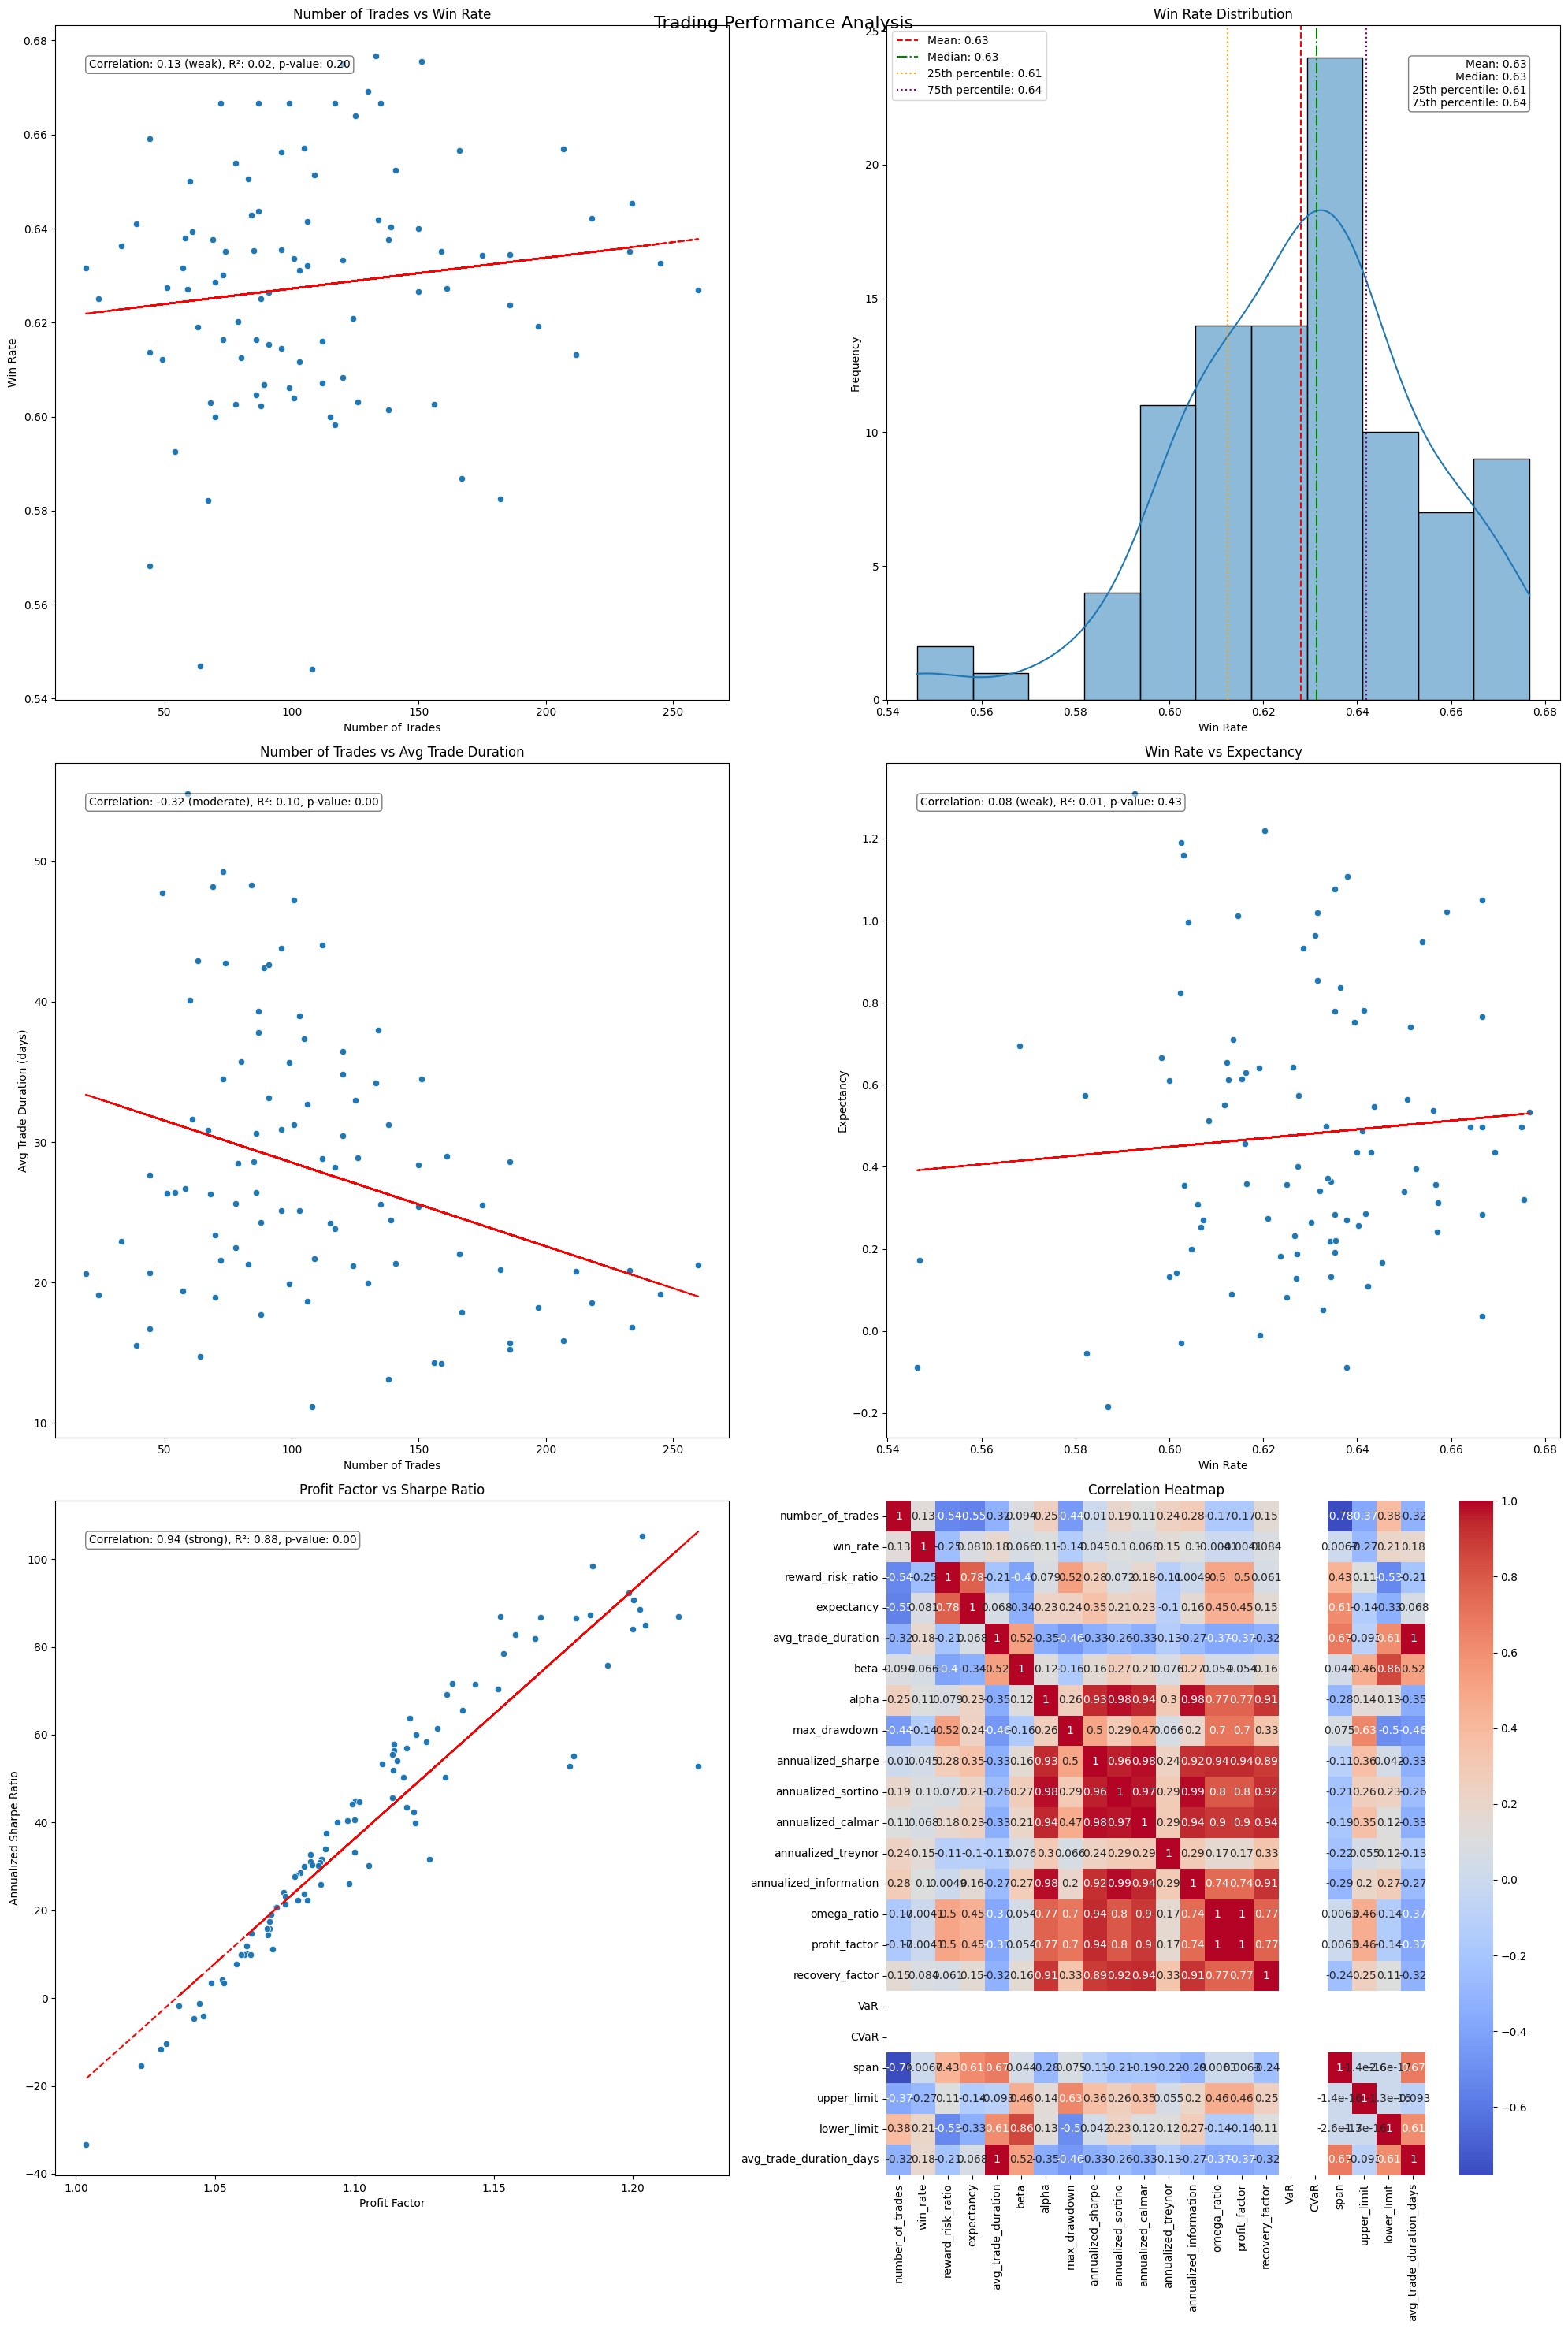

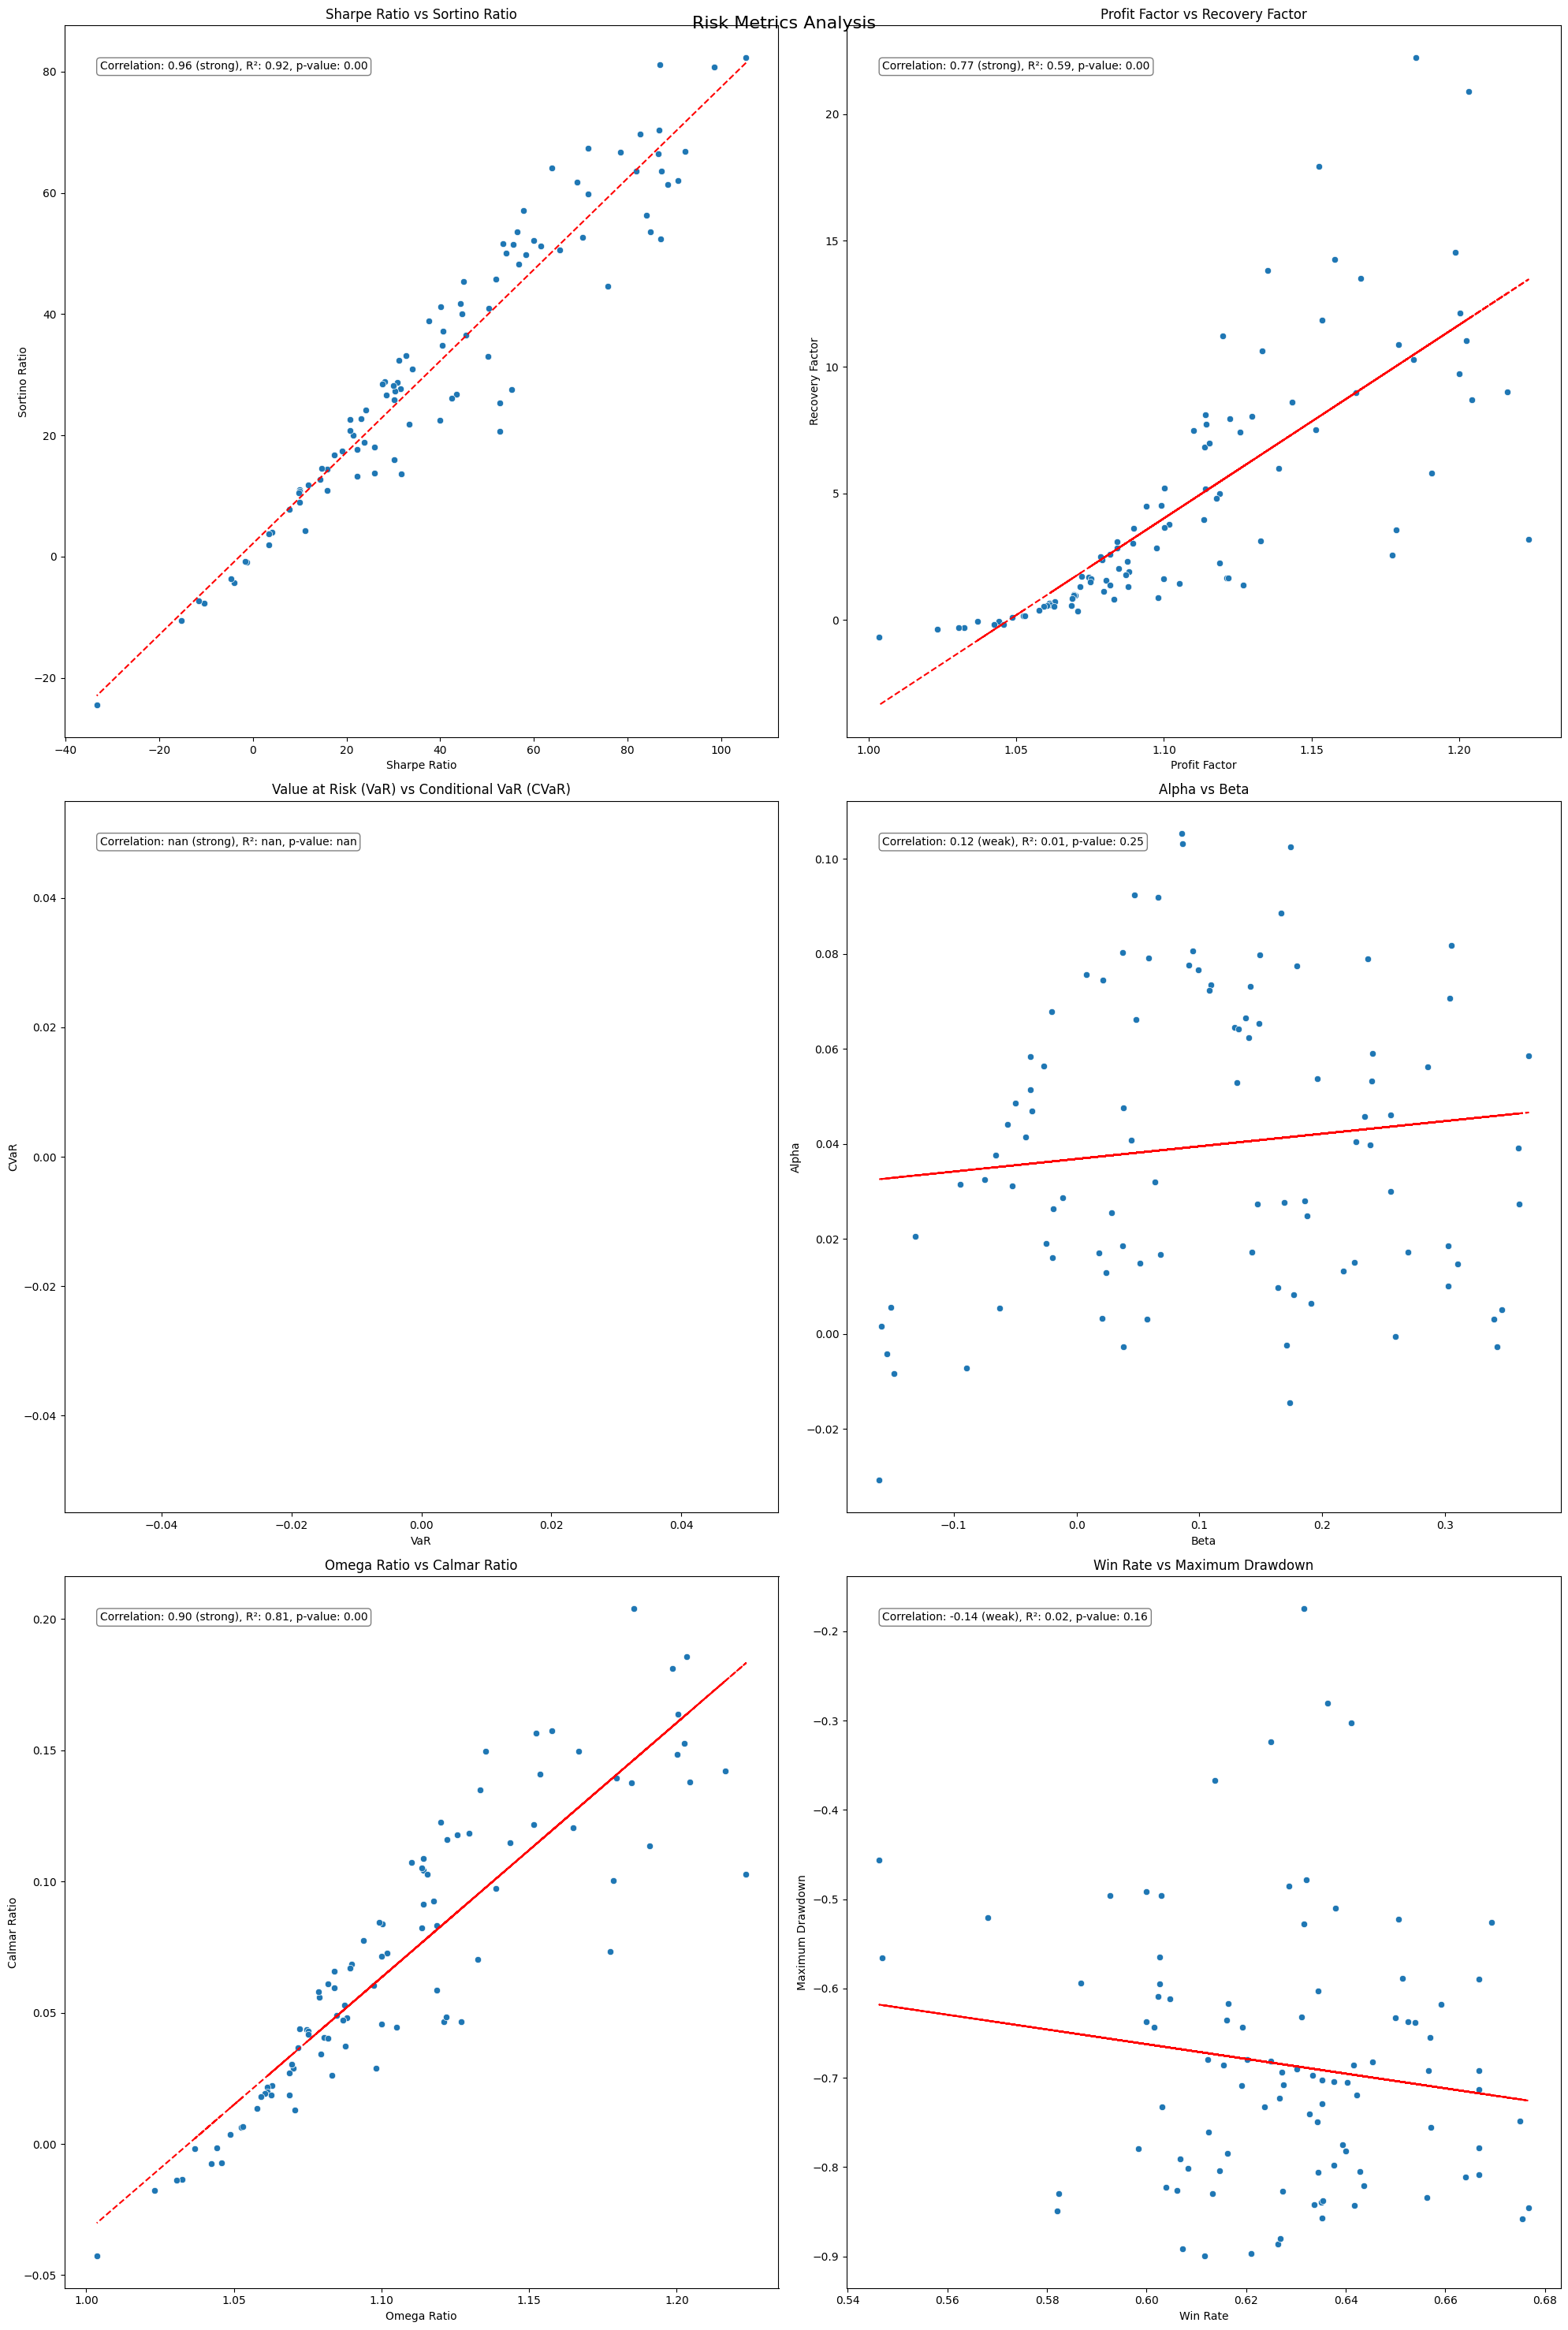

In [35]:
analyze_trading_performance(df_optimization_results)
# print_summary_statistics(df_optimization_results)
analyze_risk_metrics(df_optimization_results)


In [20]:
best_strategies = identify_best_strategies(df_optimization_results, params=['span', 'upper_limit', 'lower_limit'])
best_strategies

span  upper_limit  lower_limit  annualized_sharpe  annualized_sortino  \
42    15         10.0        -10.0         105.323145           82.260373   
26    10         10.0        -10.0          98.472294           80.708127   
25    10         10.0         -7.5          86.913765           81.116503   
30    10         15.0        -10.0          92.363302           66.872990   
54    20          7.5        -10.0          86.734170           70.390314   

    omega_ratio  profit_factor  recovery_factor  number_of_trades  win_rate  \
42     1.203340       1.203340        20.903774               109   0.65138   
26     1.185391       1.185391        22.219993               130   0.66923   
25     1.152392       1.152392        17.927143               139   0.64029   
30     1.198584       1.198584        14.524137               106   0.63208   
54     1.166761       1.166761        13.489455               103   0.63107   

    expectancy         avg_trade_duration  
42    0.741664 21 days 16:03:51.192660550  
26    0.435190 19 days 23:02:46.153846153  
25    0.256248 24 days 11:02:09.496402877  
30    0.341451 18 days 16:03:23.773584905  
54    0.964088 25 days 02:58:15.145631068

# Summary

1. Number of Trades increasing together with Win Rate - more trades -> higher win rate, but low R^2 ratio indicates that this relationship is unlikely.
2. Win Rate distribution around 0.60%
3. Win Rate vs Max Drawdown does not show significant correlation -> no information on whether high win related to higher risk

Win Rate distribution seems consistent, but not significant relationship between the other results. Might not be as robust.